<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Ensemble Techniques Project : Easy Travel</font></center>

## Problem Statement

**Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of ForeignLabor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of
intended employment.

**Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You
as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification mode.

1. Facilitate the process of visa approval
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based the drivers that significantly influence the case status.

**Data Dictionary**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

**case_id**: ID of each visa application

**continent**: Information of continent the employee

**education_of_employee**: Information of education of the employee

**has_job_experience**: Does the employee have any job experience? Y= Yes; N = No

**requires_job_training**: Does the employee require any job training? Y = Yes; N = No

**no_of_employees**: Number of employees in the employer's company

**yr_of_estab**: Year in which the employer's company was established

**region_of_employment**: Information of foreign worker's intended region of employment in the US.

**prevailing_wage**: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not
underpaid compared to other workers offering the same or similar service in the same area of employment.

**unit_of_wag**e: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

**full_time_position**: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position

**case_status**: Flag indicating if the Visa was certified or denied

## Import required libraries

In [55]:
# For data loading, processing and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# to compute
import time
import sys

In [57]:
# For pre-processing, data split, modelling, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)

## Configure section

In [58]:
# set all configuration at this section

# Enable the plots inline for the notebook output
%matplotlib inline

# path to the data set
path = '/content/drive/MyDrive/Ensemble/EasyVisa.csv'

# float format for dataframes
pd.options.display.float_format = '{:.2f}'.format

# plot default size for visualization
plt.rcParams['figure.figsize'] = (10,5)

## Load the data

In [59]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# read the csv data set
easy_visa_data = pd.read_csv(path)

# Assign the source data frame to another one to work on
df = easy_visa_data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview of the data

In [60]:
# understand the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**:

**Integer fields** : no_of_employees, yr_of_estab

**Float fields** : prevailing_fields

**Object fields** : case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, case_status


* The fields seems set with correct data type

* The required memory for the data set is about **2.3** MB



In [61]:
# check the number of rows and columns
df.shape

(25480, 12)

**Observations**:

* There are 25480 rows and 12 columns in the data set.

In [62]:
# print the first 5 rows
df.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0           592.20         Hour                  Y      Denied  
1         83425.65         Year                  Y   Certified  
2        122996.86         Year                  Y      Denied  
3         83434.03         Year                  Y      Denied  
4        149907.39         Year                  Y   Certified

In [63]:
# print random 5 rows
df.sample(5)

case_id      continent education_of_employee has_job_experience  \
21428  EZYV21429           Asia              Master's                  N   
14090  EZYV14091           Asia              Master's                  N   
7869    EZYV7870           Asia             Doctorate                  Y   
7336    EZYV7337  North America              Master's                  Y   
4276    EZYV4277           Asia            Bachelor's                  N   

      requires_job_training  no_of_employees  yr_of_estab  \
21428                     N             2672         1981   
14090                     N             2731         2001   
7869                      N             2475         1940   
7336                      N             1658         1977   
4276                      N             1166         2003   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
21428              Midwest        118250.61         Year                  N   
14090              Midwest         89720.69         Year                  N   
7869                 South         68723.88         Year                  N   
7336                  West         53884.03         Year                  Y   
4276                 South        161864.75         Year                  Y   

      case_status  
21428   Certified  
14090   Certified  
7869    Certified  
7336    Certified  
4276       Denied

In [64]:
# print last 5 rows
df.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

**Observations**:

* The data seems do not have any abnormal or missing values.

In [65]:
# describe the numerical fields
df.describe(include='number').T

count     mean      std     min      25%      50%  \
no_of_employees 25480.00  5667.04 22877.93  -26.00  1022.00  2109.00   
yr_of_estab     25480.00  1979.41    42.37 1800.00  1976.00  1997.00   
prevailing_wage 25480.00 74455.81 52815.94    2.14 34015.48 70308.21   

                      75%       max  
no_of_employees   3504.00 602069.00  
yr_of_estab       2005.00   2016.00  
prevailing_wage 107735.51 319210.27

**Observations**:

* The number of employees should be non-negative and negatiave values possibly indicates a data error.

* The maximum number of employees, 602,069, suggests the presence of some very large establishments.

* The average number of employees is approximately 5667

* The company start years range from 1800 to 2016.

* The minimum prevailing wage is 2.14, while the maximum is 319,210.

* The average prevailing wage is approximately 74,455.

* The above statistics on prevailing wages may not be entirely accurate since wages are recorded in different units, such as hourly, weekly, monthly, and yearly. This feature needs to be standardized to a common unit for better accuracy.

In [66]:
# describe object fields
df.describe(include='object').T

count unique         top   freq
case_id                25480  25480      EZYV01      1
continent              25480      6        Asia  16861
education_of_employee  25480      4  Bachelor's  10234
has_job_experience     25480      2           Y  14802
requires_job_training  25480      2           N  22525
region_of_employment   25480      5   Northeast   7195
unit_of_wage           25480      4        Year  22962
full_time_position     25480      2           Y  22773
case_status            25480      2   Certified  17018

In [67]:
# value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('-'*40)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
----------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
----------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
----------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
----------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
----------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
-

**Observations**:

* The case_id field is unique for each record.
* The majority of applications (16,861) are for the Asian continent.
* Most applications are seeking for Bachelor's degree.
* A large proportion of applicantions require job experience.
* The majority of applications do not require job training.
* The majority off applications are from North-East region
* Most applicantions have their wage specified in the unit of 'Year'.
* A significant number of applicantions are seeking full-time positions.
* The majority of applications are certified for visas.

###Treat missing values

In [68]:
# check for missing values
df.isna().values.any()

False

**Observations**:

There are no missing values

###Treat duplicated values

In [69]:
# check for duplicated values
df.duplicated().values.any()

False

**Observations**:

No duplicated records observed

### Data Cleansing

In [70]:
# Handle data errors
df[df['no_of_employees'] < 0].head()

case_id      continent education_of_employee has_job_experience  \
245    EZYV246         Europe              Master's                  N   
378    EZYV379           Asia            Bachelor's                  N   
832    EZYV833  South America              Master's                  Y   
2918  EZYV2919           Asia              Master's                  Y   
6439  EZYV6440           Asia            Bachelor's                  N   

     requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
245                      N              -25         1980            Northeast   
378                      Y              -11         2011            Northeast   
832                      N              -17         2002                South   
2918                     N              -26         2005              Midwest   
6439                     N              -14         2013                South   

      prevailing_wage unit_of_wage full_time_position case_status  
245          39452.99         Year                  Y   Certified  
378          32506.14         Year                  Y      Denied  
832         129701.94         Year                  Y   Certified  
2918        112799.46         Year                  Y   Certified  
6439           103.97         Hour                  Y      Denied

The number of employees could not be negative. This has to be validated with source team. However for this analysis it is assumed that negative sign is typo.

In [71]:
# Take absolute values
df['no_of_employees'] = df['no_of_employees'].abs()
df['no_of_employees'].describe()

count    25480.00
mean      5667.09
std      22877.92
min         11.00
25%       1022.00
50%       2109.00
75%       3504.00
max     602069.00
Name: no_of_employees, dtype: float64

**Observations**:

The negative values are removed.

In [72]:
# standardize the prevailed wage to one unit i.e. Hour
df['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

In [73]:
# function that converts the wage to hourly for each of the unit
# The below values has to be validated with experts
# Year => 52 weeks  * 40 hrs - 12 public holidays - 8 sick or casual leaves = 2080 - 160 = 1920 hrs
# Month => 20 * 8hrs - 1.5 leaves = 160 - 12 = 148 hrs
# weekly => 40 - 4 hrs = 36 hrs
def convert_to_hours(row):
  unit_of_wage = row['unit_of_wage']
  prevailing_wage = row['prevailing_wage']
  if unit_of_wage == 'Year':
    return round(prevailing_wage / 1920,2)
  elif unit_of_wage == 'Month':
    return round(prevailing_wage / 148,2)
  elif unit_of_wage == 'Week':
    return round(prevailing_wage / 36,2)
  else:
    return prevailing_wage


In [74]:
df['prevailing_wage_hr'] = df.apply(convert_to_hours, axis=1)

In [75]:
df.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  \
0           592.20         Hour                  Y      Denied   
1         83425.65         Year                  Y   Certified   
2        122996.86         Year                  Y      Denied   
3         83434.03         Year                  Y      Denied   
4        149907.39         Year                  Y   Certified   

   prevailing_wage_hr  
0              592.20  
1               43.45  
2               64.06  
3               43.46  
4               78.08

#### drop columns : case_id

In [76]:
df = df.drop('case_id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
 11  prevailing_wage_hr     25480 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.3+ MB


## Exploratory Data Analysis

### Univarient Analysis

#### Numeric Features

In [77]:
# This function plots the box plot and histogram for numerical features in univarient analysis
def boxplot_histogram(data, feature, figsize=(15,8), kde=True, bins=None):
  """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
  """
  fig, (axes_box, axes_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.35, 0.65)}, figsize=figsize)

  # boxplot
  sns.boxplot(data=data, x=feature, ax=axes_box, showmeans=True, color="violet")

  # histogram
  if bins :
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde, bins=bins)
  else:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde)

  # set mean and median in histogram
  axes_hist.axvline(data[feature].mean(), color='green', linestyle='--')
  axes_hist.axvline(data[feature].median(), color='black', linestyle='-')
  plt.show()

In [78]:
# identify numerical features
num_fields = df.select_dtypes(include='number').columns.to_list()
num_fields

['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'prevailing_wage_hr']

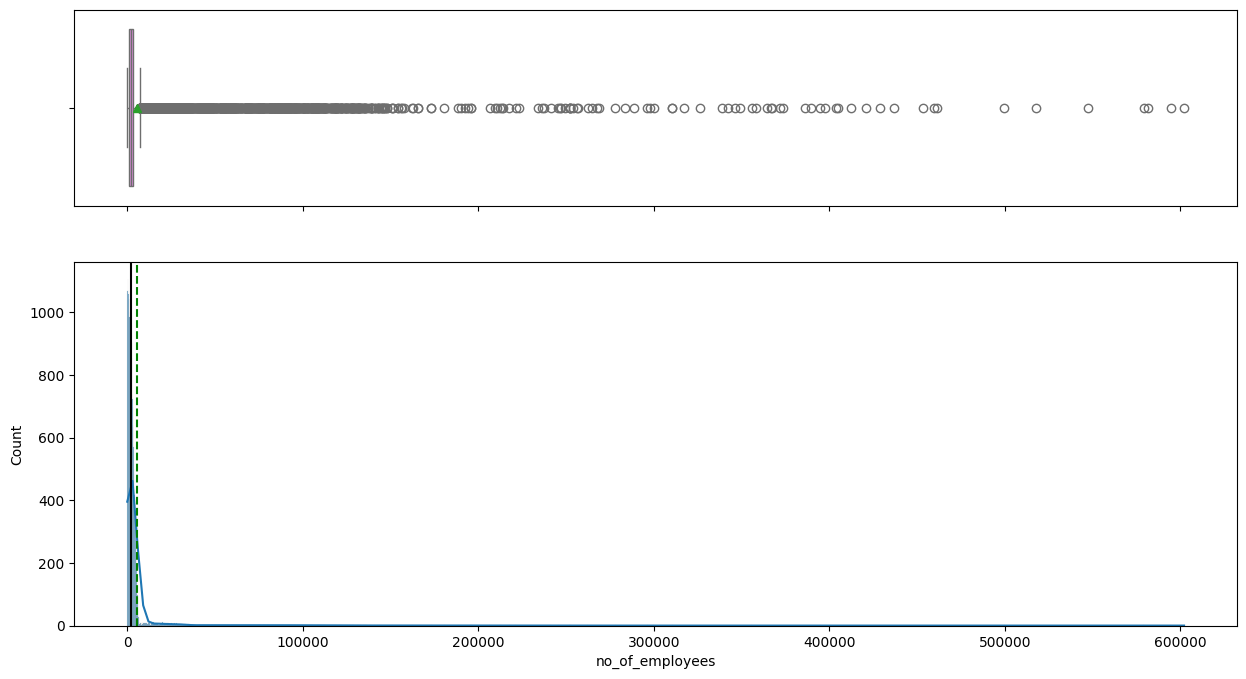

In [79]:
# box and histogram for no_of_employees
boxplot_histogram(df, 'no_of_employees')

**Observations**:

* The distribution of the number of employees in a company is right-skewed.
* There are numerous outliers present on right tail

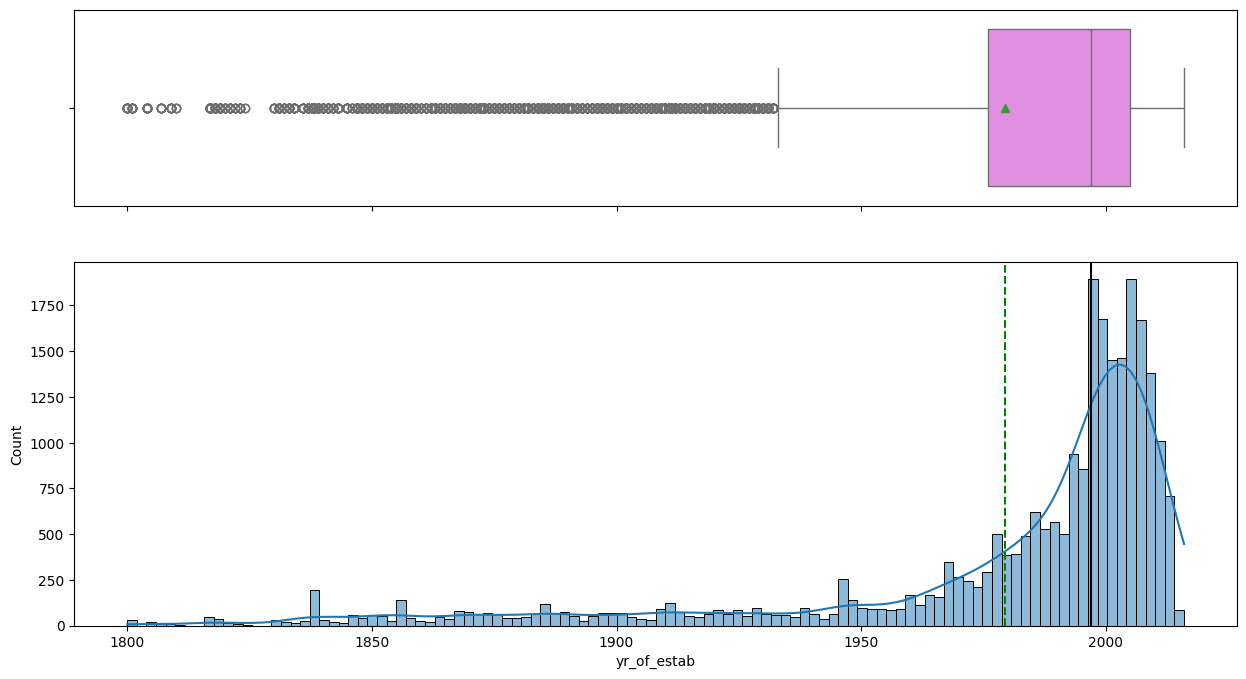

In [80]:
# box and histogram for yr_of_estab
boxplot_histogram(df, 'yr_of_estab')

**Observations**:
*  The distribution of year established is left skewed
*  There are outliers on the lower bound of the distribution.
*  There is a noticeable upward trend in the number of applications over time.

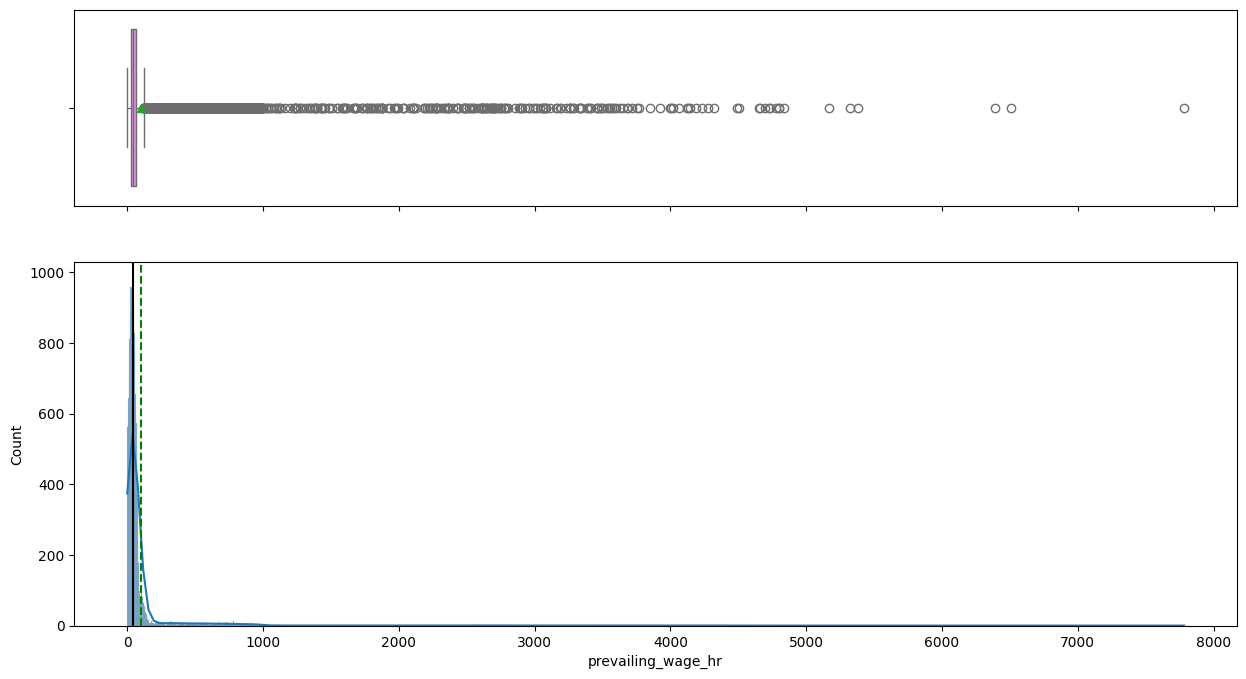

In [81]:
# box and histogram for prevailing_wage_hr
boxplot_histogram(df, 'prevailing_wage_hr')

**Observations**:
*  The distribution of prevailing wages is right-skewed.
*  The distribution has many outliers above the upper bound

#### Categorical Features

In [82]:
# identify categorical features
cat_features = df.select_dtypes(include='object').columns.to_list()
cat_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [83]:
# plot a barplot with labels for given features
def labelled_barplot(data, features,cols=1,figsize=None, legend=True, bivarient=False):
  rows = (len(features)+cols - 1)//cols
  if figsize is None:
    plt.figure(figsize=(cols*6,rows*4))
  else:
    plt.figure(figsize=figsize)


  for i,feature in enumerate(features):
    plt.subplot(rows,cols,i+1)

    if bivarient == True:
      hue='case_status'
    else:
      hue = feature

    ax = sns.countplot(data, x=feature,palette="Paired",hue=hue,order=df[feature].value_counts().index)
    for container in ax.containers:
      ax.bar_label(container, fmt='%d', fontsize=10)
    ax.set_title(f'Count plot - {feature}')

    ax.tick_params(axis='x', rotation=90)
    if legend == False :
      ax.legend_.remove()

  plt.tight_layout()
  plt.show()

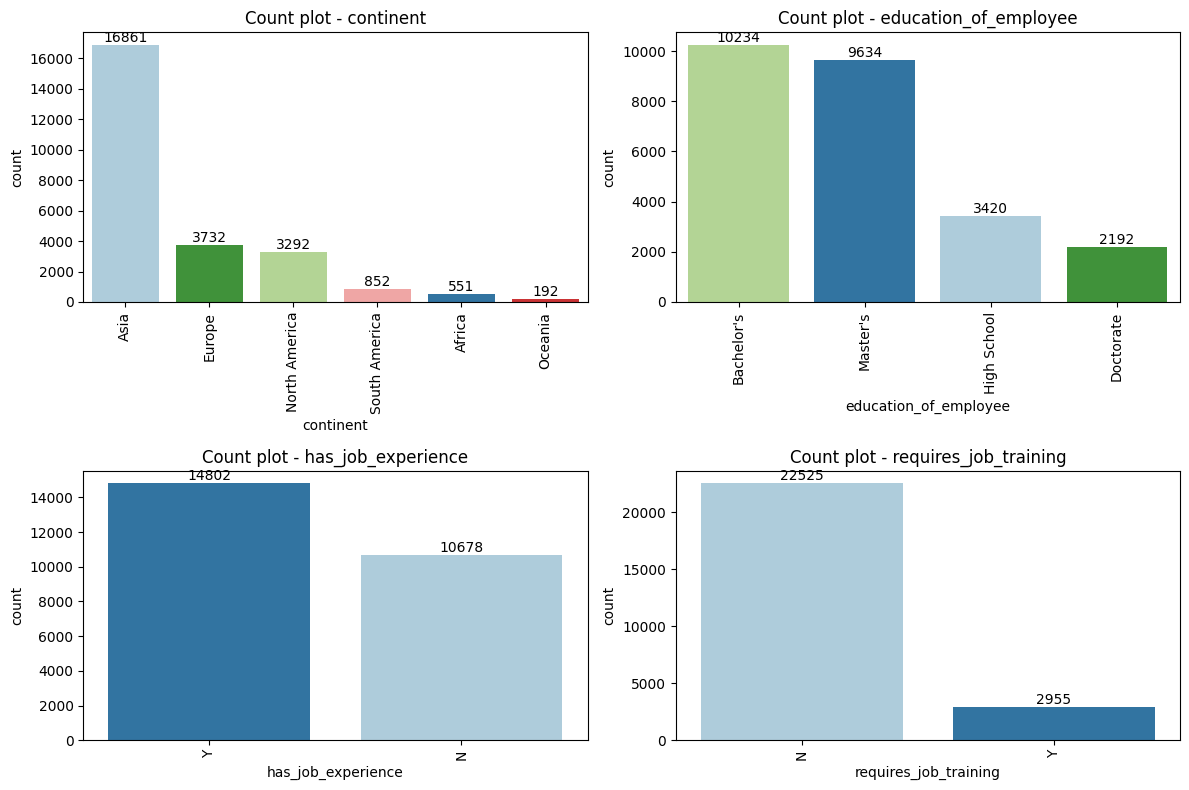

In [84]:
# count plot for continent, education_of_employee, has_job_experience, requires_job_training
labelled_barplot(df, ['continent','education_of_employee','has_job_experience','requires_job_training'],cols=2)

**Observations**:

* Most of the applications are from Asia continent.
* Oceania records the fewest applications.
* Most jobs require candidates to have a Bachelor's degree
* Positions requiring a Doctorate degree are very rare.
* Most companies prefer candidates with job experience.
* The majority of companies do not plan to offer job training.

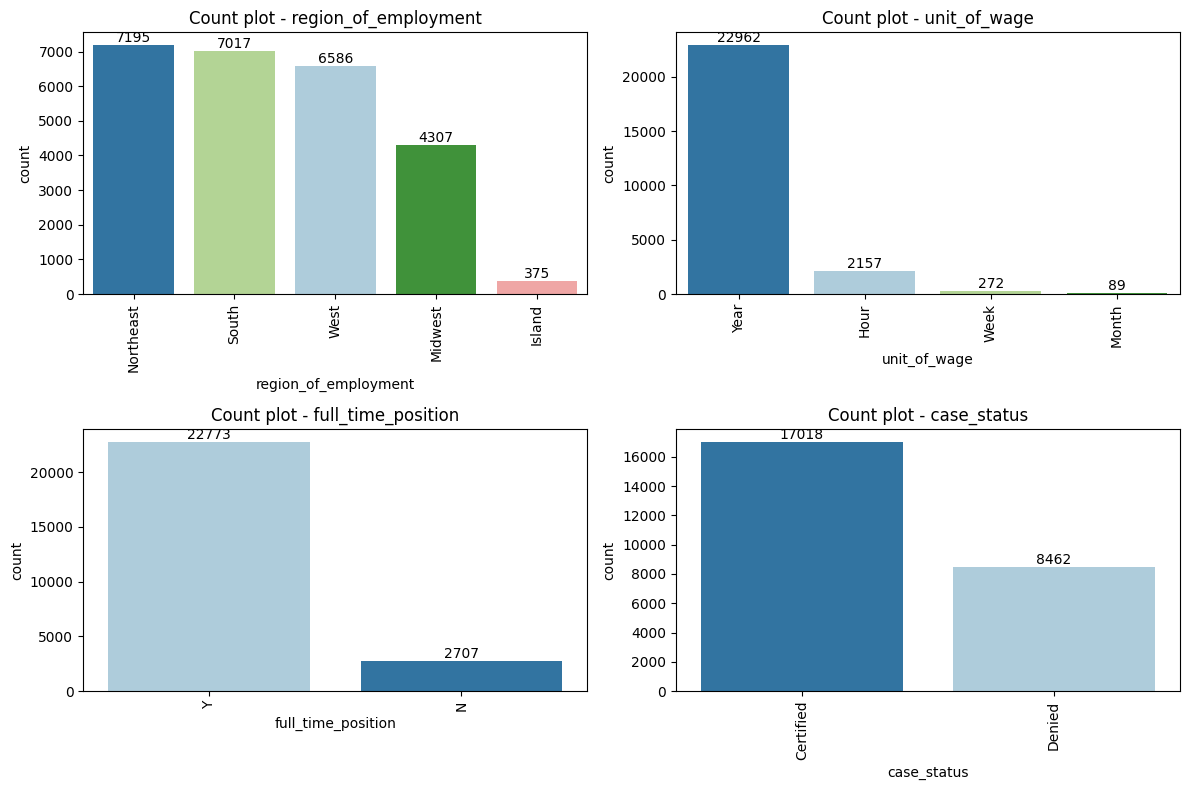

In [85]:
# count plot for region_of_employment, unit_of_wage, full_time_position and case_status
labelled_barplot(df, ['region_of_employment','unit_of_wage','full_time_position','case_status'],cols=2)

**Observations**:
* The Northeast region exhibits the highest job demand, whereas the Island region shows the lowest
* Most jobs list the wage unit as "Yearly," with only a few specifying "Monthly".
* Most of the positions are for full time.
* The majority of visa applications are approved.

### Bivarient Analysis

#### Numeric Features

In [86]:
# Lets add a new column for case_status_nr that maps certified to 1 and Denied to 0
df['case_status_nr'] = df['case_status'].map({'Certified' : 1, 'Denied' : 0})
df['case_status_nr'].value_counts()

case_status_nr
1    17018
0     8462
Name: count, dtype: int64

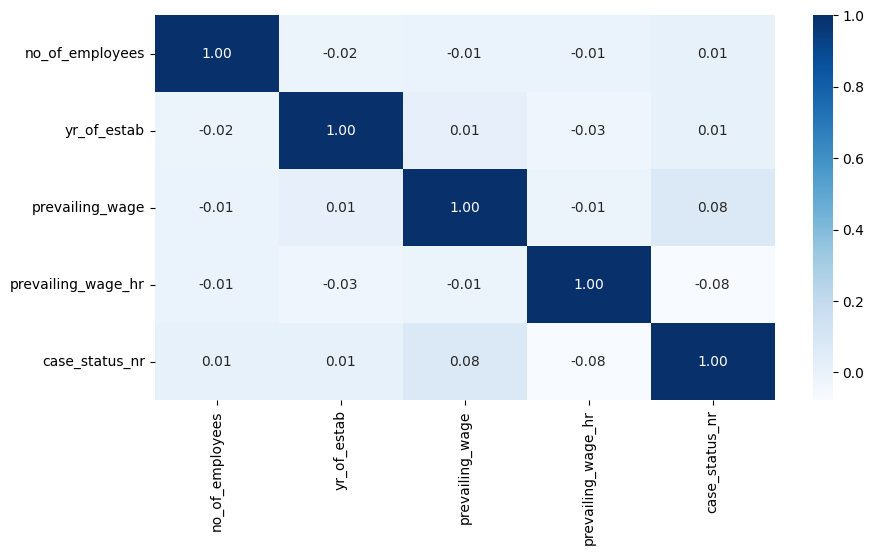

In [87]:
# lets analyze the correlation between the features
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues');

**Observations**:

There is no correlation among the numerical features

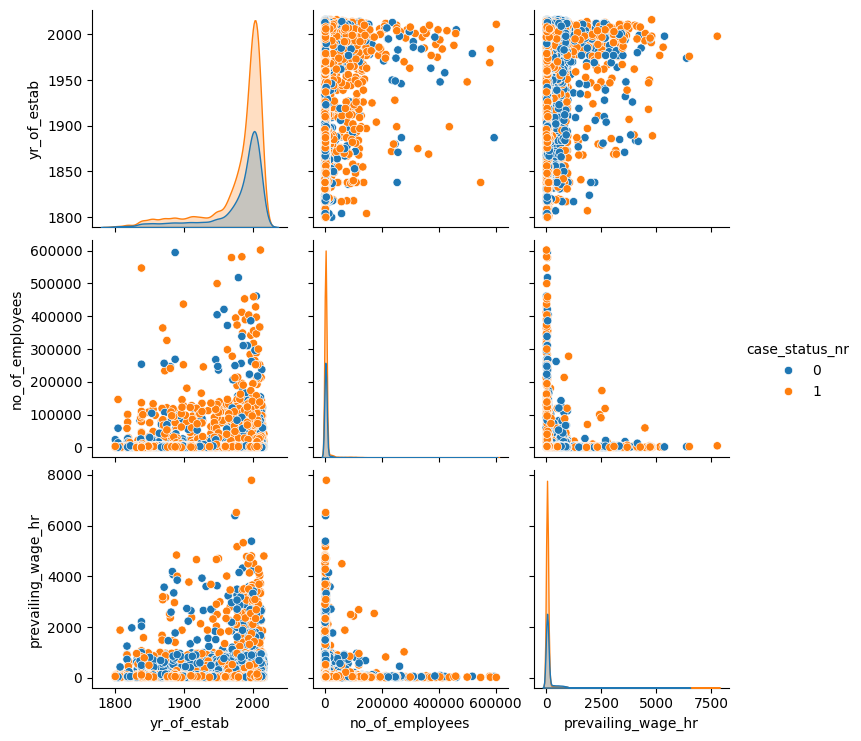

In [88]:
# visualize using pairplot
sns.pairplot(data=df[['yr_of_estab','no_of_employees','prevailing_wage_hr','case_status_nr']], hue='case_status_nr');

**Observations**:

* There is no clear correlation among the numerical features.
* The number of visa approvals has increased in recent years.
* Visa-approved applications tend to have higher prevailing wages.
* Companies with more employees generally enjoy higher success rates in visa approvals.


#### Catgorical Features

In [89]:
# print categorical features
cat_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [90]:
# Function to plot labelled stacked bar with respect to target variable (case_status)
def labelled_stacked_bar(data, feature, target):
  """
  stacked bar plot with labelled percentages

  data: dataframe
  feature: dataframe column
  target : target variable
  """
  count = data[feature].nunique()
  sorter = data[target].value_counts().index[-1]
  ctb = pd.crosstab(df[feature], df[target],margins=True).sort_values(by=sorter, ascending=False)
  print(ctb)
  print('-'*120)
  ctbp = pd.crosstab(df[feature], df[target],normalize='index').sort_values(by=sorter, ascending=False) * 100

  ax = ctbp.plot(kind='bar',stacked=True, figsize=(count+5,4))
  for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%', label_type='center')
  plt.legend(loc='upper left', bbox_to_anchor=(1,1))
  plt.title(f'{target} - {feature}')
  plt.xticks(rotation=90)
  plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


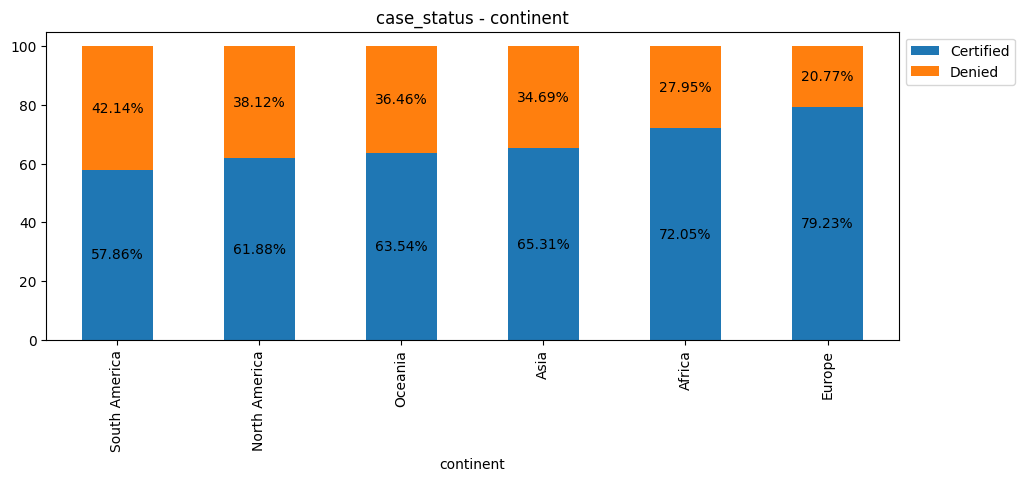

In [91]:
# case_status - continent
labelled_stacked_bar(df,'continent', 'case_status')

 **Question**: How does the visa status vary across different continents?


* Europe has the highest proportion of visa approvals, followed by Africa.
* South America records the highest proportion of visa rejections, with North America coming next.
* Asia registers the largest number of visa approvals overall.
* Oceania registers the lowest number of visa approvals in total.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


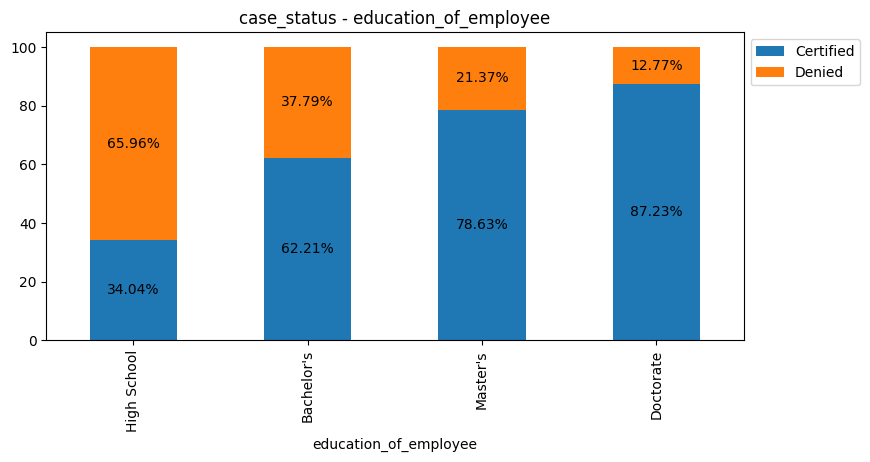

In [92]:
# case_status - education_of_employee
labelled_stacked_bar(df,'education_of_employee', 'case_status')

**Observations**:
* Applicants with a Doctorate degree exhibit the highest proportion of visa approvals
* Those with only a high school education experience the highest proportion of visa denials.
* However, the largest number of visa approvals comes from applicants holding a Bachelor's degree.

**Question**:  Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa
certification?

Based on the above plots and observations, it appears that higher education is associated with an increased likelihood of visa certification. Therefore, we can conclude that education plays a crucial role in the visa approval process.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


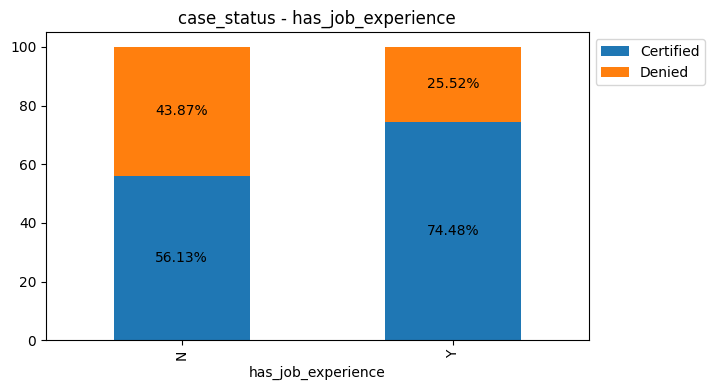

In [93]:
# case_status - has_job_experience
labelled_stacked_bar(df,'has_job_experience', 'case_status')

**Question**:  Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

*  Applicants with job experience have a higher likelihood of visa approval.
*  Conversely, those without job experience have lower chances of obtaining visa approval

From the above observations, it can be concluded that work experience significantly influences visa approval status.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


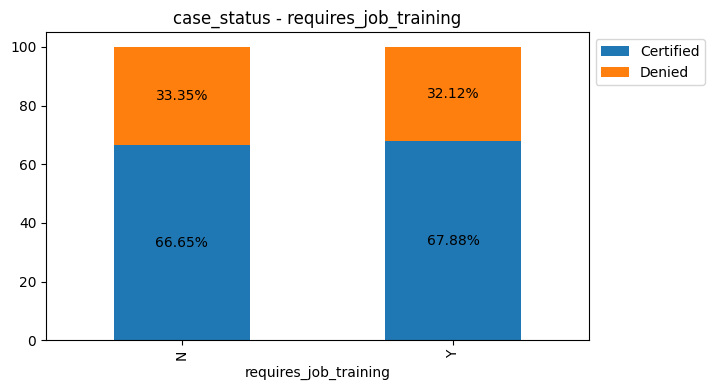

In [94]:
# case_status - requires_job_training
labelled_stacked_bar(df,'requires_job_training', 'case_status')

**Observations**:

* The proportion of visa approvals and denials is nearly same for positions requiring job training.

* Overall, most applications without a job training requirement are approved.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


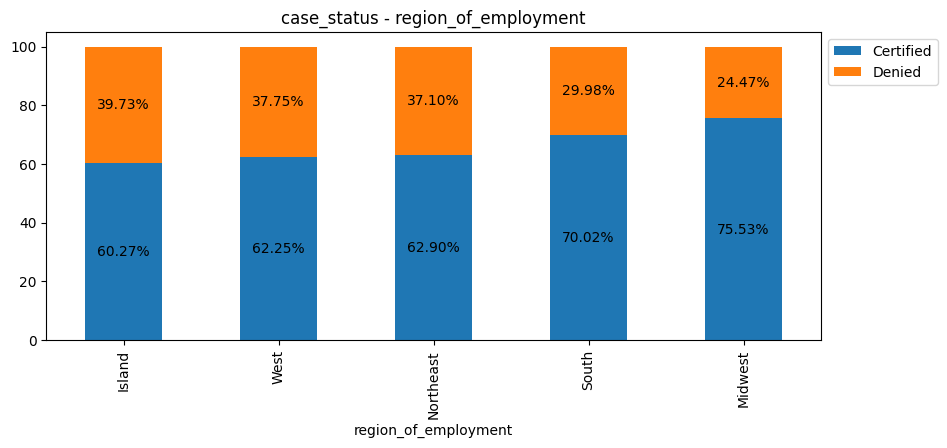

In [95]:
# case_status - region_of_employment
labelled_stacked_bar(df,'region_of_employment', 'case_status')

**Observations**:

* The Midwest region exhibits the highest proportion of visa approvals, whereas the Island region has the lowest.

* Overall, the Northeast region leads in the total number of visa approvals.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


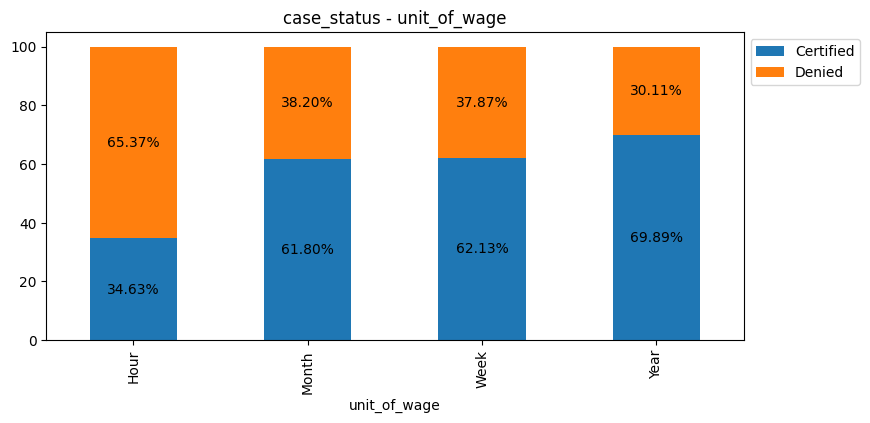

In [96]:
# case_status - unit_of_wage
labelled_stacked_bar(df,'unit_of_wage', 'case_status')

**Question**: In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

* The proportion of visa approvals is highest when the wage unit is "Year" and lowest when it is "Hour."

* Overall, the number of visa approvals is lowest when the wage unit is "Month" and highest when it is "Year."

The pay unit "Year" is most likely to be cerified for visa.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


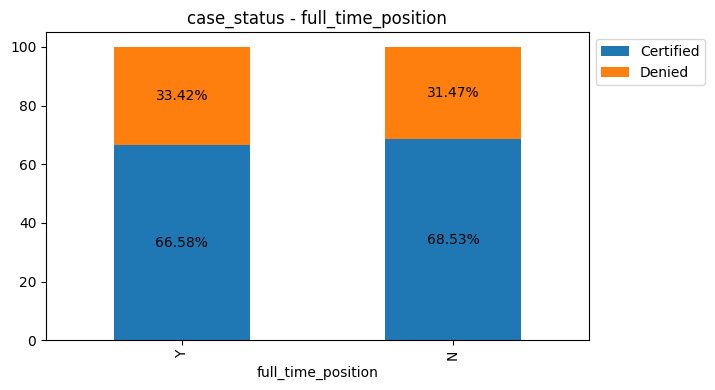

In [97]:
# case_status - full_time_position
labelled_stacked_bar(df,'full_time_position', 'case_status')

**Observations**:

* The proportion of visa approvals is slightly higher for positions that are part time.
* Overall, full-time positions receive a greater number of visa approvals.

### Multivarient Analysis

In [98]:
# lets see the stats of unit_of_wage , prevailing_wage with respect to case_status
df.groupby(['unit_of_wage','case_status'])['prevailing_wage'].mean()

unit_of_wage  case_status
Hour          Certified       424.92
              Denied          409.09
Month         Certified     87237.55
              Denied        88167.63
Week          Certified     85974.77
              Denied        85003.10
Year          Certified     80746.41
              Denied        82345.84
Name: prevailing_wage, dtype: float64

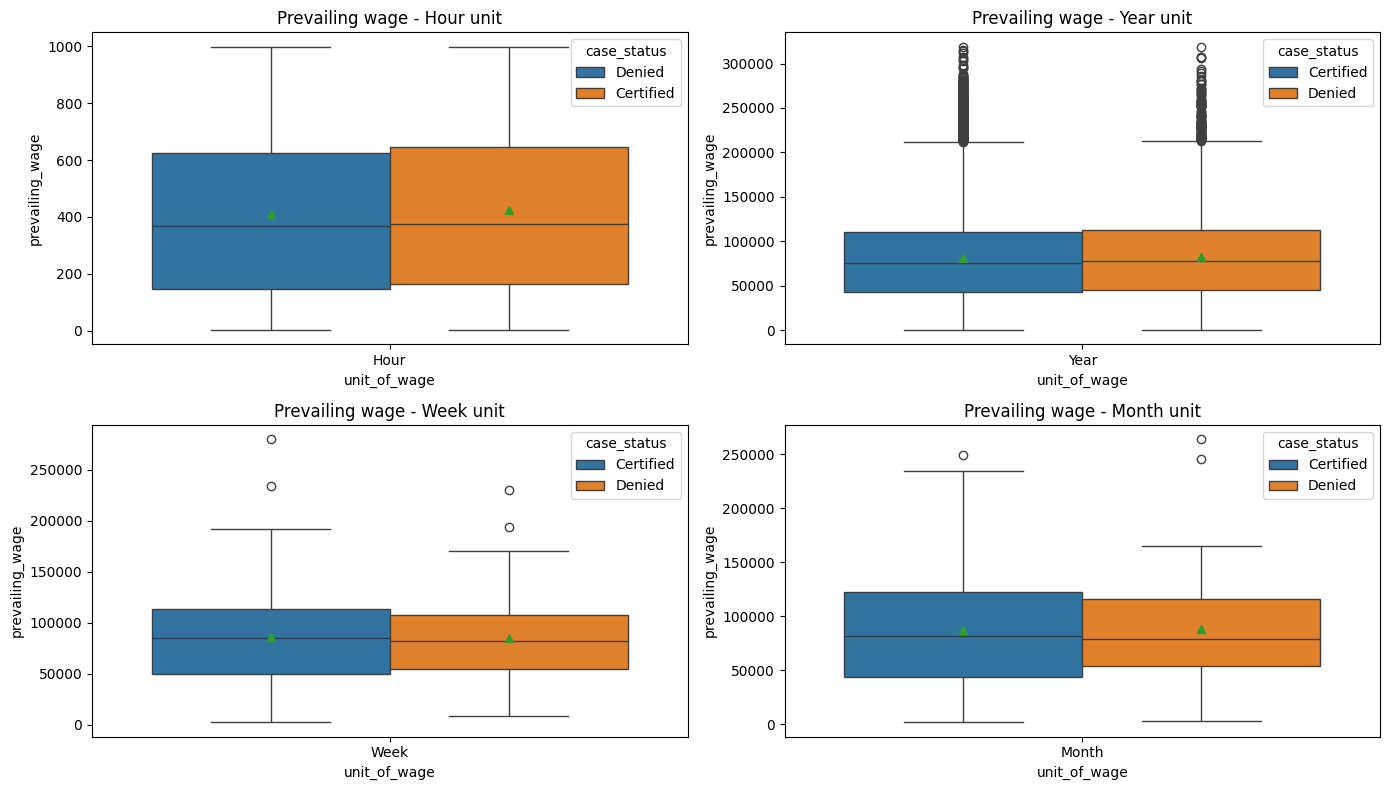

In [99]:
# Barplot for case_status, prevailing_wage, unit_of_wage
plt.figure(figsize=(14,8))
for i, unit in enumerate(['Hour', 'Year', 'Week', 'Month']):
  plt.subplot(2,2,i+1)
  plt.title(f'Prevailing wage - {unit} unit')
  sns.boxplot(df[df['unit_of_wage']==unit], x='unit_of_wage', y='prevailing_wage', hue='case_status', showmeans=True)
plt.tight_layout()
plt.show()

**Question**:  The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?


The average prevailing wage for certified and denied visa statuses does not differ significantly. However, the following slight variations can be observed.

* The average prevailing wage is slightly higher for applications with a certified status when the pay unit is 'Hour', 'Week', or 'Month.'

* When the pay unit is 'Year', the average prevailing wage for certified applications is slightly lower

* When the pay unit is 'Year', the propotion of certified is more compared to denied.

## Data preprocessing

### Missing values and treatment

In [100]:
df.isna().values.any()

False

**Observations**:

There are no missing values in the data set.

### Outliers detection and handling

In [101]:
# identify numeric variables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['no_of_employees',
 'yr_of_estab',
 'prevailing_wage',
 'prevailing_wage_hr',
 'case_status_nr']

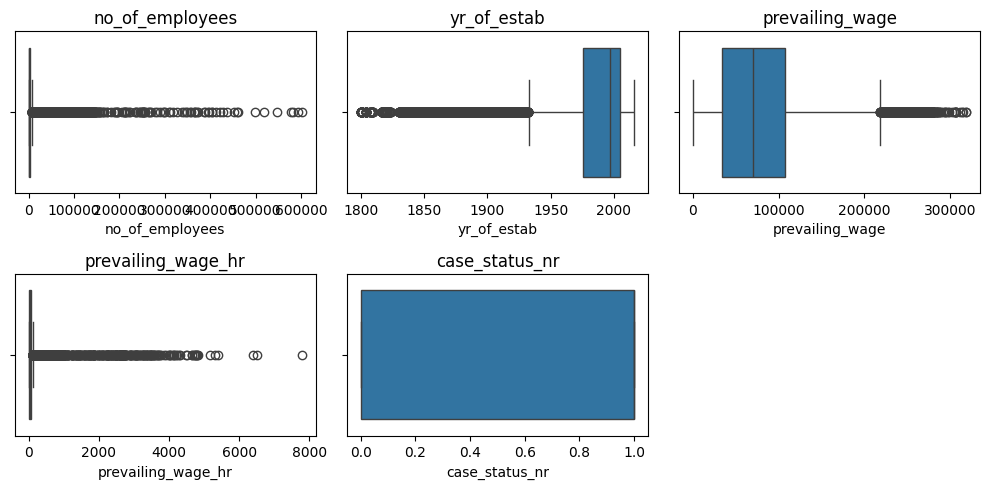

In [102]:
# outlier detection using boxplot
for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df, x=variable)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [103]:
df[df['unit_of_wage'] == 'Year']['prevailing_wage'].describe()

count    22962.00
mean     81228.08
std      49951.47
min        100.00
25%      43715.96
50%      76174.50
75%     111341.96
max     319210.27
Name: prevailing_wage, dtype: float64

**Observations**:

* Outliers are present in the features: no_of_employees, yr_of_estab, and prevailing_wage ( prevailing_wage_hr is standardised feature for prevailing_wage)

* These outliers were not addressed since they appear to represent valid values.
  (Though the salary of 100 dollars per year seems unrealistic and there are some really low prevailing wages)

* Negative values in the number of employees have been corrected during the EDA process.



### Feature Engineering

* The prevailing_wage feature is standardised in another feature prevailing_wage_hr using the below logic (prior to EDA in Data cleansing section)

      * Year => 52 weeks  * 40 hrs - 12 public holidays - 8 sick or casual leaves = 2080 - 160 = 1920 hrs
      * Month => 20 * 8hrs - 1.5 leaves = 160 - 12 = 148 hrs
      * weekly => 40 - 4 hrs = 36 hrs

* As the prevailing_wage feature is redundant, it is dropped

In [104]:
# drop the feature prevailing_wage
df=df.drop('prevailing_wage',axis=1)

* case_id is unique for each record and hence this feature is dropped prior to EDA

* case_status_nr is a new feature that maps certified to 1 and denied to 0.

* case_status that is categorical feature is redundant and is dropped

In [105]:
# drop the feature case_status
df = df.drop('case_status', axis=1)

* Rename the new features to the initial for easy understanding.

In [106]:
# Rename the features to the original names
df['case_status'] = df['case_status_nr']
df['prevailing_wage'] = df['prevailing_wage_hr']

# drop the temp features
df=df.drop(['case_status_nr','prevailing_wage_hr'], axis=1)

In [107]:
# check the list of variables after feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  int64  
 10  prevailing_wage        25480 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


### Data preparation for modelling

In [108]:
# Form X and y variables
X = df.drop('case_status', axis=1)
Y = df['case_status']

# convert categorical features to int using dummies function
X = pd.get_dummies(X, drop_first=True, dtype='int')

In [109]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y )

In [110]:
# check the size of predictors on train data
X_train.shape

(17836, 21)

In [111]:
# check the size of predictors on test data
X_test.shape

(7644, 21)

In [112]:
# check the percentage of classes in train data
y_train.value_counts(normalize=True)

case_status
1   0.67
0   0.33
Name: proportion, dtype: float64

In [113]:
# check the percentage of classes in train data
y_test.value_counts(normalize=True)

case_status
1   0.67
0   0.33
Name: proportion, dtype: float64

**Observation**:

Approximately 67% of the observations are classified as class 1 (certified) and 33% as class 0 (denied). This distribution is maintained in both the training and test sets.

## Model Building

### Model evaluation criteria

The model may make incorrect predictions in two ways

* It might predict an applicant's visa as certified when it is actually denied (False Positives).
* It might predict an applicant's visa as denied when it is actually certified (False Negatives).

Since it's important to accurately predict both certified and denied statuses, our goal is to reduce both false positives and false negatives.

To achieve this, improving the F1 score is crucial.


### Model Metrics

In [114]:
# function to compute model performance metrics
def model_performance_classification_sklearn(model):

  y_pred_train = model.predict(X_train)
  acc_train = accuracy_score(y_train , y_pred_train)
  recall_train = recall_score(y_train, y_pred_train)
  precision_train = precision_score(y_train, y_pred_train)
  f1_train = f1_score(y_train, y_pred_train)

  y_pred_test = model.predict(X_test)
  acc_test = accuracy_score(y_test , y_pred_test)
  recall_test = recall_score(y_test, y_pred_test)
  precision_test = precision_score(y_test, y_pred_test)
  f1_test = f1_score(y_test, y_pred_test)

  # create a dataframe for metrics
  df_metrics = pd.DataFrame(
         {
          "Train Accuracy": acc_train,
          "Test Accuracy": acc_test,
          "Train Recall": recall_train,
          "Test Recall": recall_test,
          "Train Precision": precision_train,
          "Test Precision": precision_test,
          "Train F1": f1_train,
          "Test F1": f1_test,
          },
        index=[0],)
  return df_metrics

### Confusion matrix

In [115]:
# function to plot confusion matrix
def confusion_matrix_sklearn(model, title=None):

  if title == None:
    title = str(model)

  y_pred_train = model.predict(X_train)
  cm_train = confusion_matrix(y_train, y_pred_train)

  # lets compute percentages for train data
  labels_train = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_train.flatten().sum())]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.heatmap(cm_train, annot=labels_train, fmt='', cmap='Blues')
  plt.title(f'Confusion Matrix: {title} - Train data', fontsize=10)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  y_pred_test = model.predict(X_test)
  cm_test = confusion_matrix(y_test, y_pred_test)

  # lets compute percentages for test data
  labels_test = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_test.flatten().sum())]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)
  plt.subplot(1,2,2)
  sns.heatmap(cm_test, annot=labels_test, fmt='', cmap='Blues')
  plt.title(f'Confusion Matrix: {title} - Test data', fontsize=10)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


  plt.tight_layout()
  plt.show()

In [116]:
# function to plot decision tree
def plot_decision_tree(model):
  # plot the decision tree
  feature_names = list(X_train.columns)
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(20, 10))
  out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
  )
  # below code will add arrows to the decision tree split if they are missing
  for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
  plt.show()

In [117]:
# function to plot importantant features in the tree building
def plot_important_features(model):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = list(X_train.columns)

  plt.figure(figsize=(8, 8))
  plt.title("Feature Importances")
  plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel("Relative Importance")
  plt.show()

### Decision Tree - default

In [118]:
# Decision tree with default parameters
dtree_def_model = DecisionTreeClassifier(random_state=42)
dtree_def_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

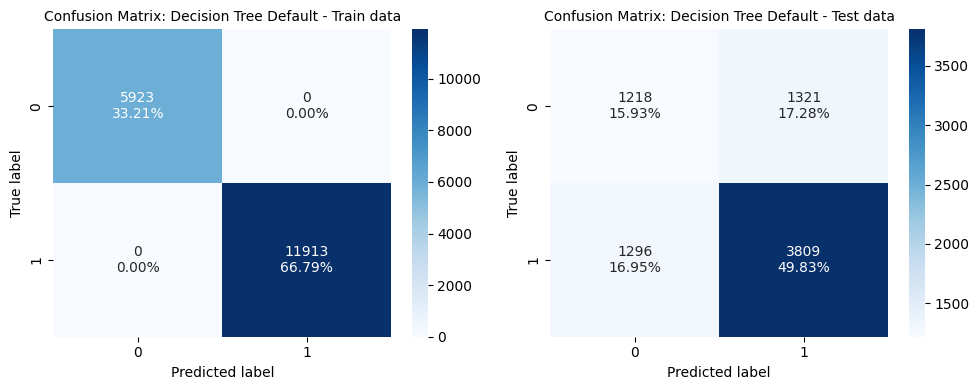

In [119]:
# confusion matrix for train and test data
confusion_matrix_sklearn(dtree_def_model, 'Decision Tree Default')

**Observations**:

* The decision tree model with default parameters classified the training data for certified and denied statuses with zero misclassifications
* The model shows significant misclassifications on the test data, with both false positives and false negatives each comprising about 17%.

In [120]:
# compute the metrics on train and test data
model_performance_classification_sklearn(dtree_def_model)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            1.00           0.66          1.00         0.75             1.00   

   Test Precision  Train F1  Test F1  
0            0.74      1.00     0.74

**Observations**:

* The decision tree model with default parameters perfectly classified the training data, achieving maximum scores for accuracy, recall, precision, and F1.
* However, these metrics significantly drop on the test data.
* This large discrepancy between training and test performance indicates that the model is overfitting.

### Decision Tree Class weights

In [121]:
# Decsion tree with class weights
dtree_cw_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dtree_cw_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

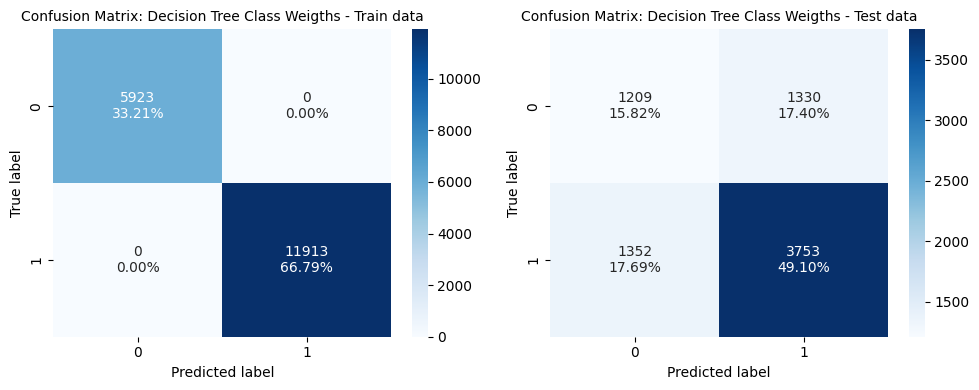

In [122]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(dtree_cw_model, 'Decision Tree Class Weigths')

**Observations**:

* The decision tree model with class weights perfectly classified the training data for certified and denied statuses.
* However, it exhibits approximately 17% misclassifications overall, with both false positives and false negatives accounting for about 17% each.

In [123]:
# compute the metrics on train and test data
model_performance_classification_sklearn(dtree_cw_model)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            1.00           0.65          1.00         0.74             1.00   

   Test Precision  Train F1  Test F1  
0            0.74      1.00     0.74

**Observations**:

* The decision tree model with class weights did not show any improvement and performed similarly to the default model.

* Performance metrics on the training data are excellent.

* However, the metrics on the test data are notably poorer.

* The model is overfitting.

In [124]:
comp_models_test = pd.concat( [model_performance_classification_sklearn(dtree_def_model),
                                model_performance_classification_sklearn(dtree_cw_model)],
                               axis=0)
comp_models_test.index = ['Default Decision Tree', 'Class Weight Decision Tree']
comp_models_test

Train Accuracy  Test Accuracy  Train Recall  \
Default Decision Tree                 1.00           0.66          1.00   
Class Weight Decision Tree            1.00           0.65          1.00   

                            Test Recall  Train Precision  Test Precision  \
Default Decision Tree              0.75             1.00            0.74   
Class Weight Decision Tree         0.74             1.00            0.74   

                            Train F1  Test F1  
Default Decision Tree           1.00     0.74  
Class Weight Decision Tree      1.00     0.74

### Descision Tree - Prepruning

The model is pre-pruned and optimized with the following hyper-parameters

  * max_depth : Maximum depth of the tree
  * min_samples_split : Minimum number of samples required to split an node
  * min_samples_leaf : Minimum number of samples required to be at a leaf node
  * max_leaf_nodes : Maximum number of leaf nodes
  * min_impurity_decrease : Minimum impurity decrease required for a split

In [125]:
# descision tree model with prepuning
dtree_prepun_model =  DecisionTreeClassifier(random_state=42,
                                             max_depth = 20,
                                             min_samples_split = 10,
                                             min_samples_leaf = 3,
                                             max_leaf_nodes = 20,
                                             min_impurity_decrease = 0.01)
dtree_prepun_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=20,
                       min_impurity_decrease=0.01, min_samples_leaf=3,
                       min_samples_split=10, random_state=42)

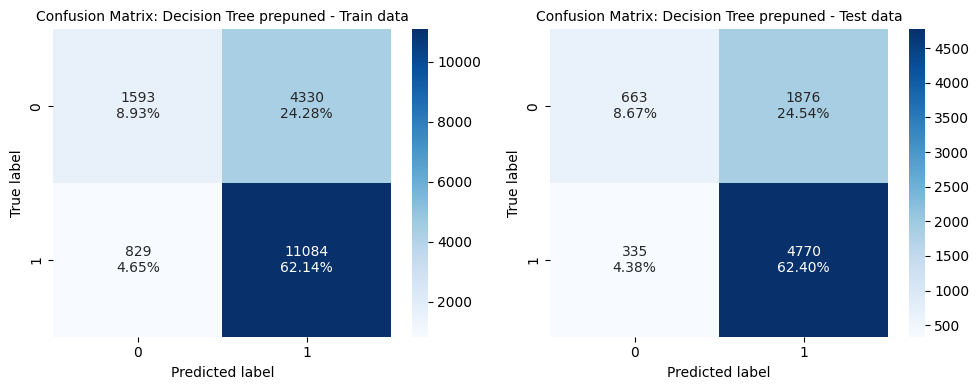

In [126]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(dtree_prepun_model, 'Decision Tree prepuned')

**Observations**:

* The model performs reasonably on the training data, with approximately 24% false positives and 5% false negatives
* Almost similar results are observed on the test data, with approximately 24% false positives and 4% false negatives

In [127]:
# compute the metrics on train and test data
model_performance_classification_sklearn(dtree_prepun_model)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.71           0.71          0.93         0.93             0.72   

   Test Precision  Train F1  Test F1  
0            0.72      0.81     0.81

**Observations**:

* The recall and F1 scores are good on both the training and test data.
* Accuracy and precision are reasonable.
* The model shows consistent performance across training and test datasets.
* There are no signs of overfitting

### Descision Tree - Preprune Tuning

Lets tune the model using prepune hyper parameters and analyze the model performance

In [128]:
# set hyper parameters for pre-pruning the tree
parameters = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [3, 5, 10],
    'max_leaf_nodes': [ 120, 50, 100],
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.05, 0.1]
}

# F1 metric to optimize
f1_scorer = metrics.make_scorer(metrics.f1_score)

# perform Grid search
dtree_prepru_tuned = DecisionTreeClassifier(random_state=42)
grid_obj = GridSearchCV(dtree_prepru_tuned, parameters, scoring=f1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_prepru_tuned = grid_obj.best_estimator_
dtree_prepru_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=50, min_samples_leaf=5,
                       random_state=42)

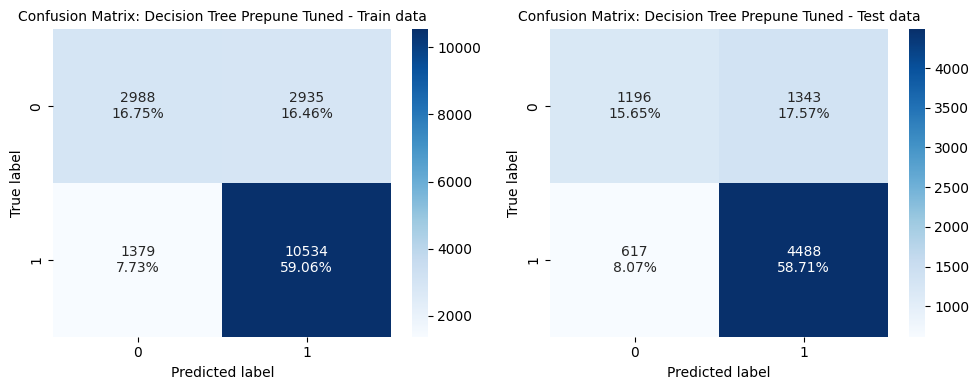

In [129]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(dtree_prepru_tuned, 'Decision Tree Prepune Tuned')

**Observations**:

* The model performed reasonably well on the training data, with about 16% false positives and 8% false negatives

* The model produced similar results on the test data, with approximately 17% false positives and 8% false negatives


In [130]:
# compute the metrics on train and test data
model_performance_classification_sklearn(dtree_prepru_tuned)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.76           0.74          0.88         0.88             0.78   

   Test Precision  Train F1  Test F1  
0            0.77      0.83     0.82

**Observations**:

* Recall and F1 scores slightly declined compared to the pre-pruned model.
* However, accuracy and precision improved, leading to an overall enhancement in the F1 score.
* The model shows consistent performance across training and test datasets.
* It is not overfitting and is generalizing well.

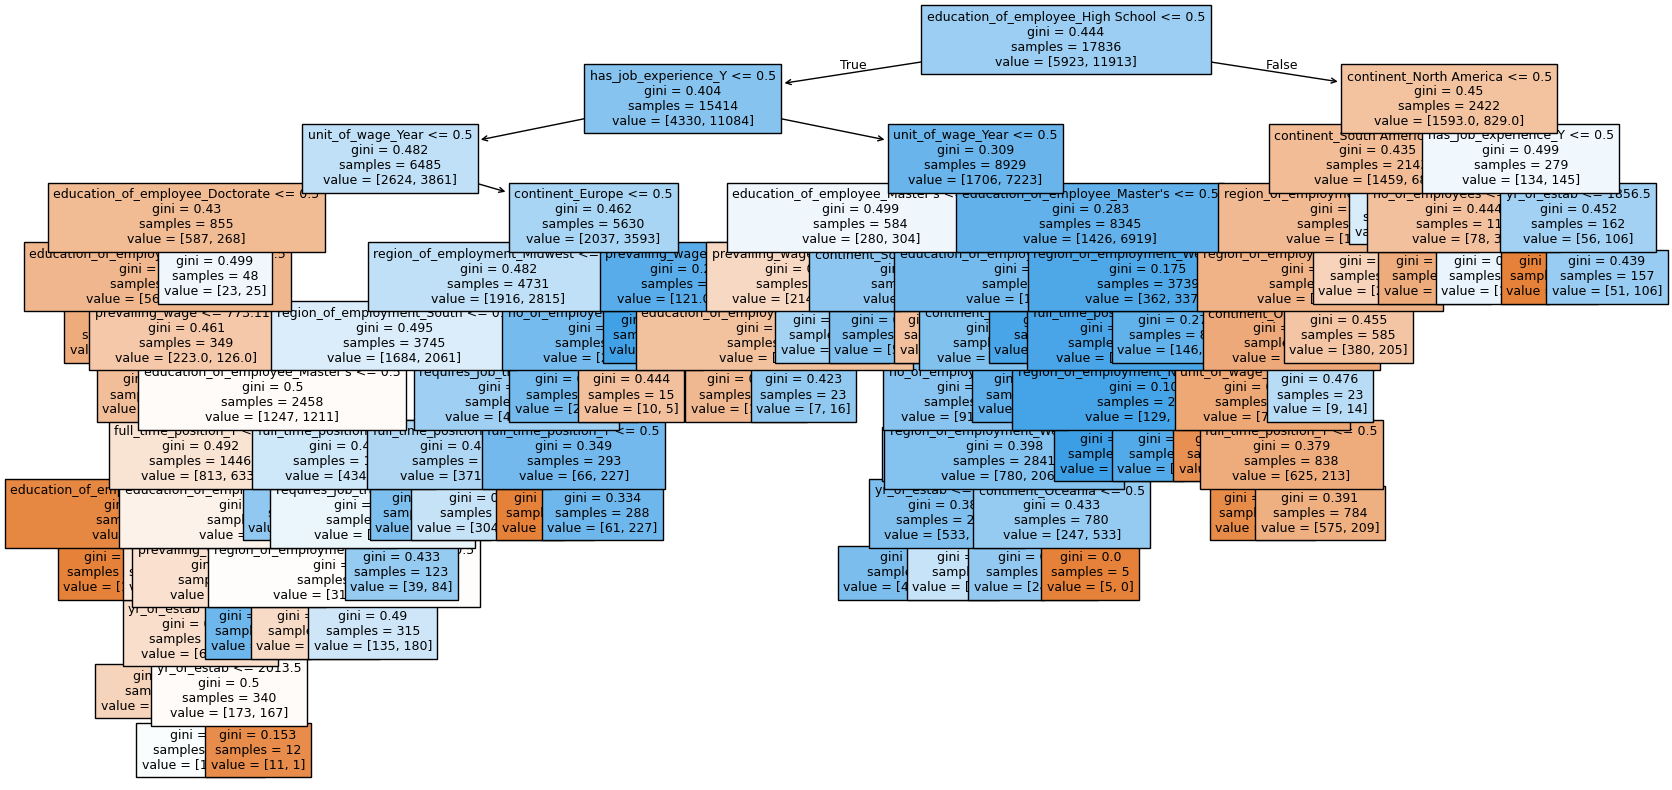

In [131]:
# plot the decision tree
plot_decision_tree(dtree_prepru_tuned)

In [132]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dtree_prepru_tuned, feature_names=X_train.columns.to_list(), show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- unit_of_wage_Year <= 0.50
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |--- weights: [341.00, 117.00] class: 0
|   |   |   |   |--- education_of_employee_Master's >  0.50
|   |   |   |   |   |--- prevailing_wage <= 773.12
|   |   |   |   |   |   |--- weights: [192.00, 93.00] class: 0
|   |   |   |   |   |--- prevailing_wage >  773.12
|   |   |   |   |   |   |--- weights: [31.00, 33.00] class: 1
|   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |--- weights: [23.00, 25.00] class: 1
|   |   |--- unit_of_wage_Year >  0.50
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |   |--- region_of_employment_South <= 0.50
|   |   |   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |   |   |--- f

**Observations**:

* If the applicant's education is not high school, they have no job experience, the pay unit is not yearly, and their education is neither Doctorate nor Master's, then the visa is likely to be denied.

* If the applicant's education is not high school, they have no job experience, the pay unit is not yearly, and their education is not Doctorate and their education is Master's, the prevailing wage (per hr) greater than 773 dollars, then the visa is likely to be classified.

* If the applicant's education is not high school, they have no job experience, the pay unit is not yearly, and their education is not Doctorate and their education is Master's, the prevailing wage (per hr) less than 773 dollars, then the visa is likely to be denied

* Similar decision rules can be interpreted for other branches as well.

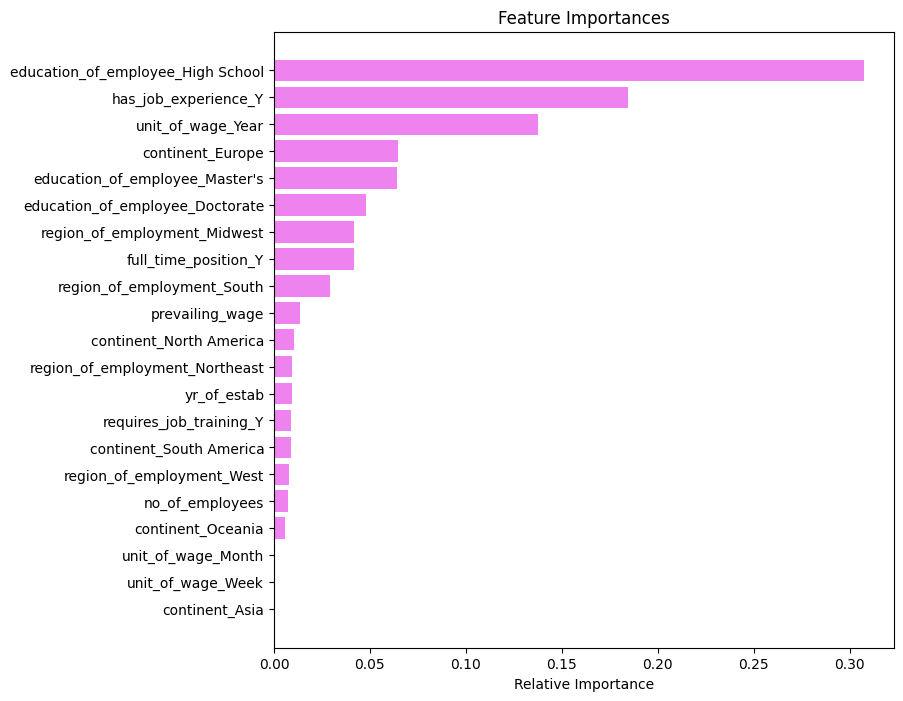

In [133]:
# plot important features
plot_important_features(dtree_prepru_tuned)

**Observations**:

* The important features in the decision making rules are
         education_of_employee_high_school
         has_job_experience_y
         unit_of_wage_year



### Decision Tree - Postpruning

Cost complexity parameter is another pruning that is done in post-pruning. In this section focus is given how to improve the model using cost complexity parameter (ccp_alpha)

In [134]:
# Model for decision tree
dtree_postprun = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = dtree_postprun.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [135]:
# print ccp_alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0           0.00       -0.00
1           0.00       -0.00
2           0.00       -0.00
3           0.00       -0.00
4           0.00       -0.00
...          ...         ...
2240        0.01        0.42
2241        0.01        0.43
2242        0.01        0.44
2243        0.03        0.46
2244        0.04        0.50

[2245 rows x 2 columns]

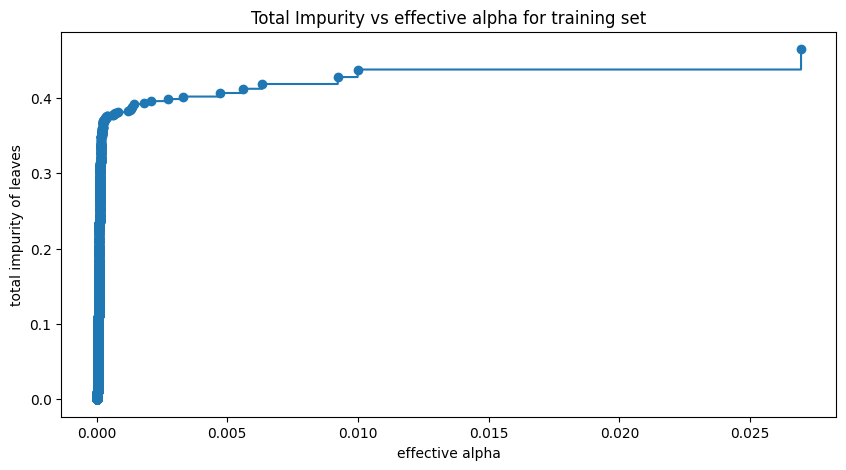

In [136]:
# plot impurities vs ccp_alphas
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observations**:

As cost complexity parameter increases, the pruning of nodes increases which leads to higher impurity leaves or nodes.

In [137]:
# lets print the number of nodes in the last tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    ))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.035331568361928634


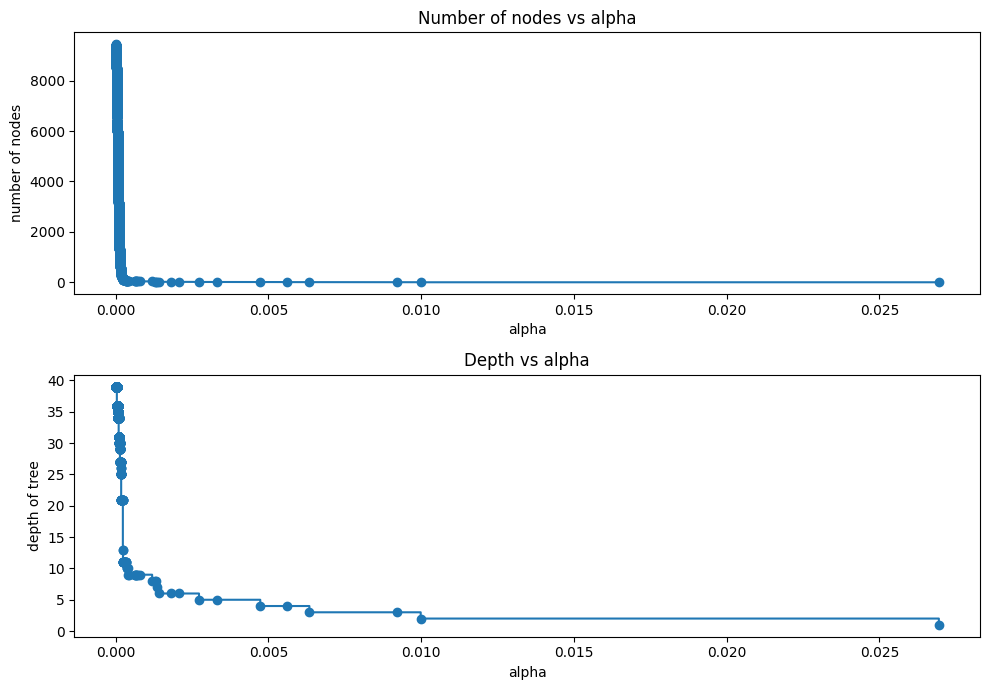

In [138]:
# plot the cost complexity parametr w.r.t Nodes and depth
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observations**:

* As cost complexity increases, the number of nodes in the tree decreases.
* Similarly, an increase in cost complexity also reduces the tree's depth.

In [139]:
# compute f1s for train data
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [140]:
# compute f1s for test data
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [141]:
# compute the scores on train and test data
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

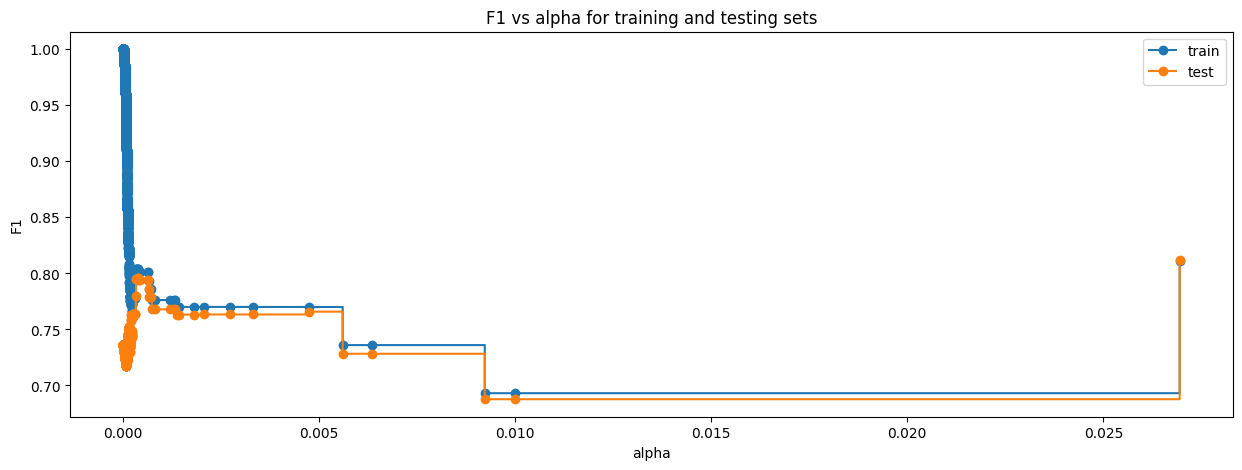

In [142]:
# plot ccp vs F1
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observations**:

* The F1_score is reasonably good at low values of complexity parameter and then it declined and increased at the end.

In [143]:
# creating the model where we get highest train and test F1
index_best_model = np.argmax(f1_test)
best_model_dpp = clfs[index_best_model]
best_model_dpp

DecisionTreeClassifier(ccp_alpha=0.02694614491476549, class_weight='balanced',
                       random_state=1)

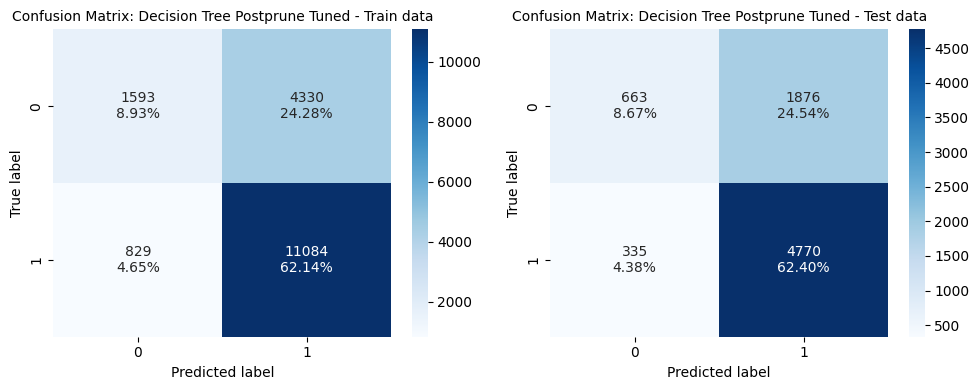

In [144]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(best_model_dpp, 'Decision Tree Postprune Tuned')

**Observations**:

* On the training data, there are approximately 24% false positives and 5% false negatives.

* The test data shows consistent results, with about 25% false positives and 4% false negatives.

In [145]:
# compute the metrics on train and test data
model_performance_classification_sklearn(best_model_dpp)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.71           0.71          0.93         0.93             0.72   

   Test Precision  Train F1  Test F1  
0            0.72      0.81     0.81

* The model is consistent with test and train data that indicates it is not overfitting.

* The performance of the model is slightly low when compared with tuned prepruned model.


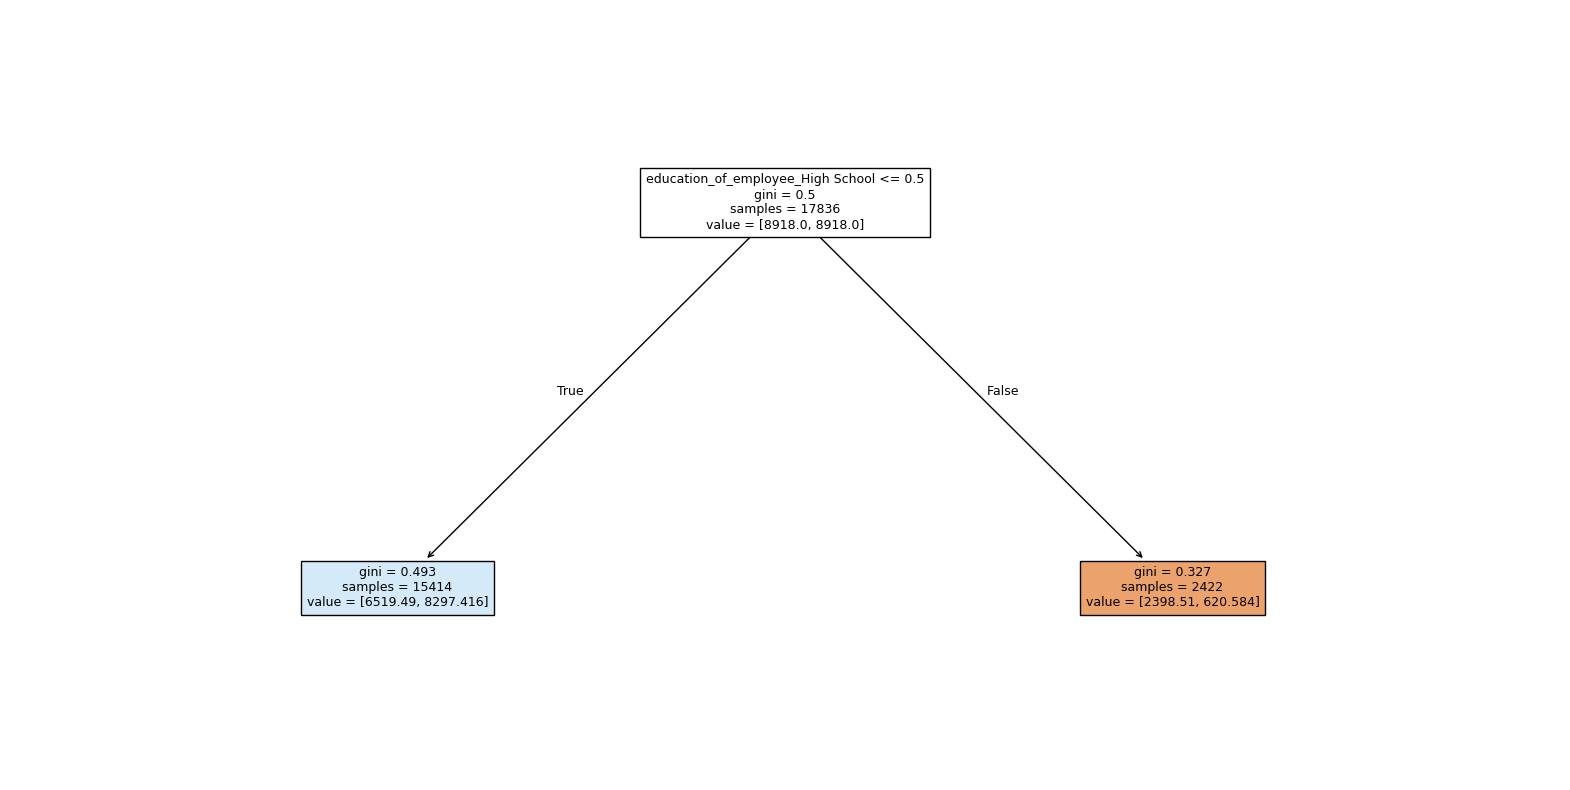

In [146]:
# plot the decision tree
plot_decision_tree(best_model_dpp)

**Observations**:

Although the model performs reasonably well, the structure of the tree suggests that it may be oversimplified.

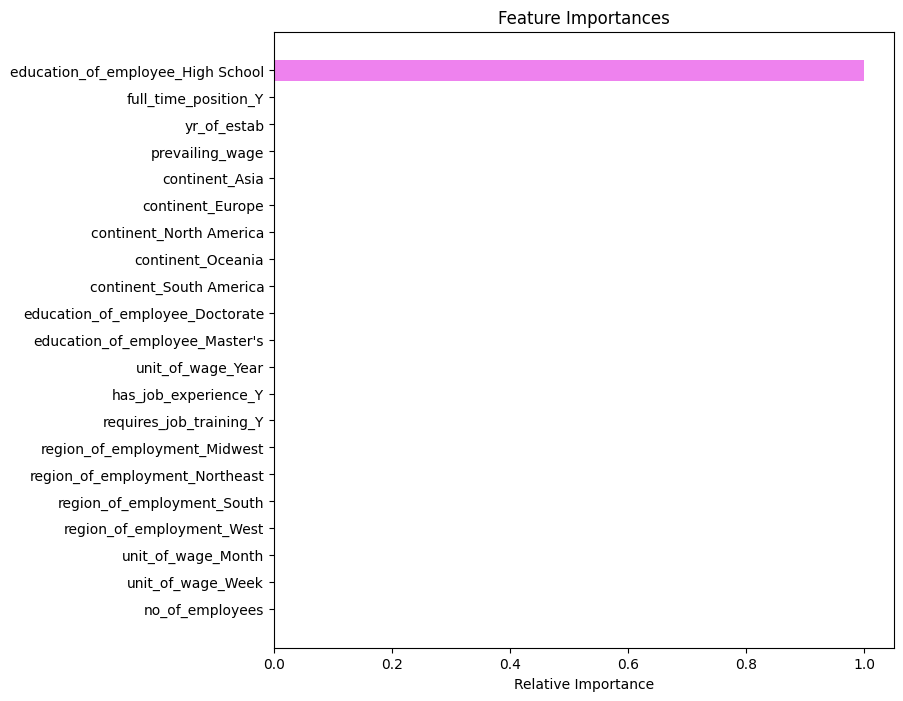

In [147]:
# plot important features
plot_important_features(best_model_dpp)

**Observations**:

*  The model is oversimplified with only one important feature.

### Decision Tree - Post pruned - Tuning

Lets Furthur tune the model by focusing on the low values of cost complexity

In [148]:
# hyper parameters
parameters_pp = {
    'ccp_alpha': [0.001, 0.002, 0.003]
}

# F1 metric to optimize
f1_scorer = metrics.make_scorer(metrics.f1_score)

# perform Grid search
dtree_postpru_tuned = DecisionTreeClassifier(random_state=42)
grid_obj = GridSearchCV(dtree_postpru_tuned, parameters_pp, scoring=f1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_postpru_tuned = grid_obj.best_estimator_
dtree_postpru_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

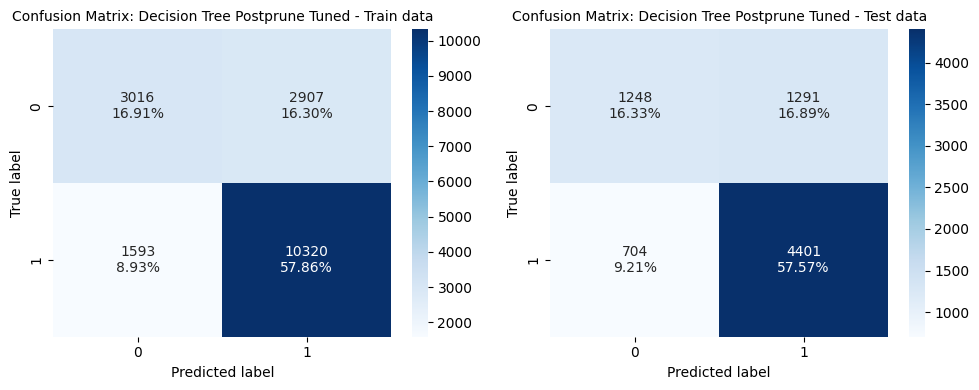

In [149]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(dtree_postpru_tuned, 'Decision Tree Postprune Tuned')

**Observations**:

* The model performs well on the training data, with about 16% false positives and 8% false negatives.
* It shows consistent performance on the test data, with 16% false positives and 9% false negatives.

In [150]:
# compute the metrics on train and test data
model_performance_classification_sklearn(dtree_postpru_tuned)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.75           0.74          0.87         0.86             0.78   

   Test Precision  Train F1  Test F1  
0            0.77      0.82     0.82

**Observations**:

* Accuracy, precision, and F1 scores have improved.
* Recall has slightly declined.
* The consistency of metrics between training and test data indicates that the model is not overfitting.

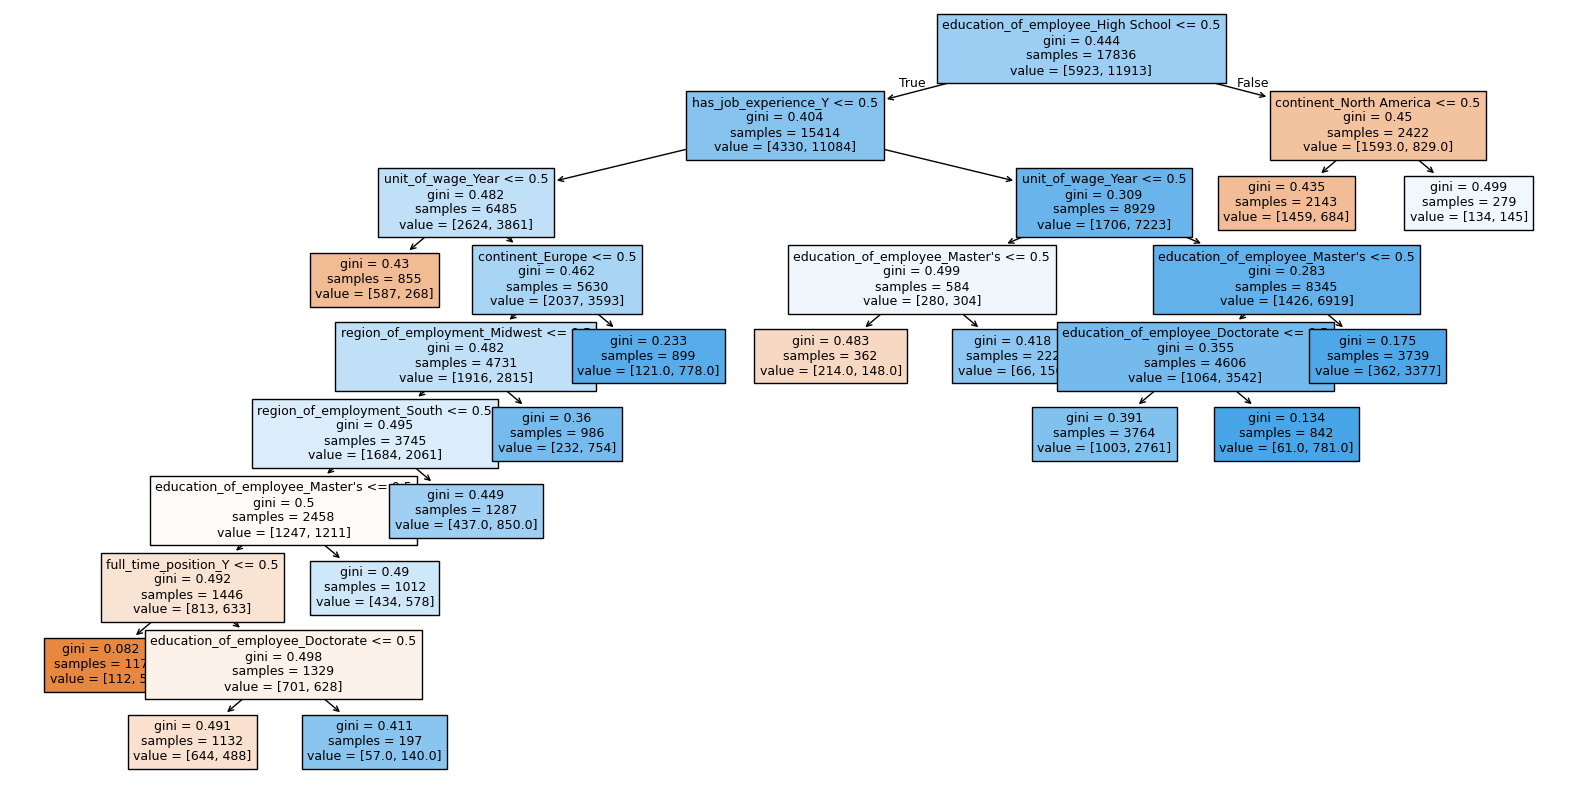

In [151]:
# plot the decision tree
plot_decision_tree(dtree_postpru_tuned)

* The model performs reasonably well and has simplified the decision tree, making the decision rules more interpretable

In [152]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dtree_prepru_tuned, feature_names=X_train.columns.to_list(), show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- unit_of_wage_Year <= 0.50
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |--- weights: [341.00, 117.00] class: 0
|   |   |   |   |--- education_of_employee_Master's >  0.50
|   |   |   |   |   |--- prevailing_wage <= 773.12
|   |   |   |   |   |   |--- weights: [192.00, 93.00] class: 0
|   |   |   |   |   |--- prevailing_wage >  773.12
|   |   |   |   |   |   |--- weights: [31.00, 33.00] class: 1
|   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |--- weights: [23.00, 25.00] class: 1
|   |   |--- unit_of_wage_Year >  0.50
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |   |--- region_of_employment_South <= 0.50
|   |   |   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |   |   |--- f

**Observations**:

* The decision rules are more simplified

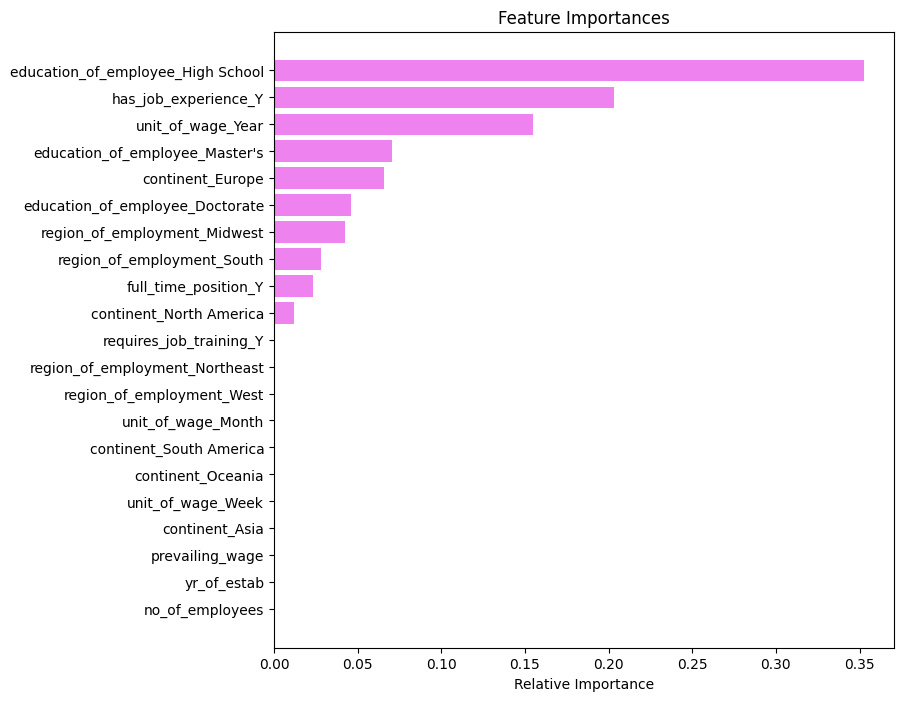

In [153]:
# plot important features
plot_important_features(dtree_postpru_tuned)

**Observations**:

The more important features in influencing the decision are

      * education_of_employee_High_School
      * has_job_experience_Y
      * unit_of_wage_Year

### Bagging Classifier

In [154]:
# bagging classifier with decision tree
bagging_estimator=BaggingClassifier(random_state=42)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=42)

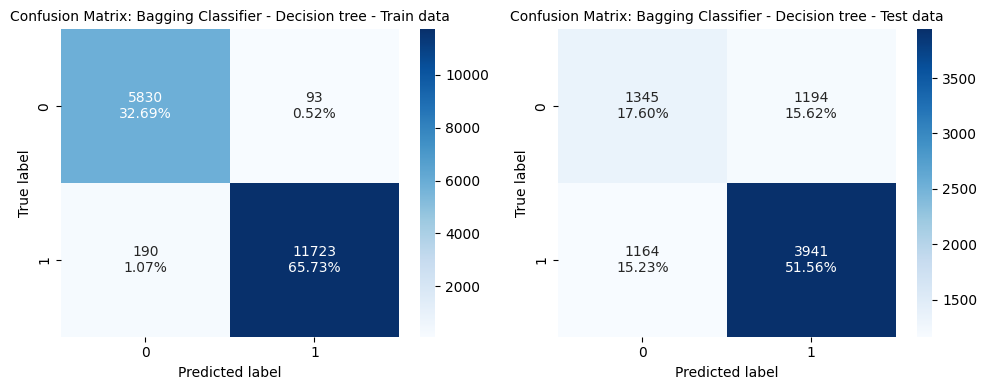

In [155]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(bagging_estimator, 'Bagging Classifier - Decision tree')

**Observations**:

* The model performs exceptionally well on the training data, with only about 0.5% false positives and 1% false negatives.

* However, its performance on the test data is inconsistent, showing 15% false positives and 15% false negatives.

In [156]:
# compute the metrics on train and test data
model_performance_classification_sklearn(bagging_estimator)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.98           0.69          0.98         0.77             0.99   

   Test Precision  Train F1  Test F1  
0            0.77      0.99     0.77

**Observations**:

* The performance metrics are excellent on the training data.
* However, the inconsistency in metrics on the test data suggests that the model is overfitting.

### Bagging Classifier - Tuning

The important hyperparameters available for bagging classifier are:

* base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
* n_estimators: The number of trees in the forest, default = 100.
* max_features: The number of features to consider when looking for the best split.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
* bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [157]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=42)

# Grid of parameters to choose from
## add from article
parameters = {
              'estimator' : [ DecisionTreeClassifier(random_state=42),
                               LogisticRegression(solver='liblinear',max_iter=1000, random_state=42)],
              'n_estimators' : [10,100,110],
              'max_features': [0.3,0.5,0.7,1],
              'max_samples': [0.7,0.8,0.9,1]
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.5, max_samples=0.8, n_estimators=110,
                  random_state=42)

In [158]:
print(bagging_estimator_tuned)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.5, max_samples=0.8, n_estimators=110,
                  random_state=42)


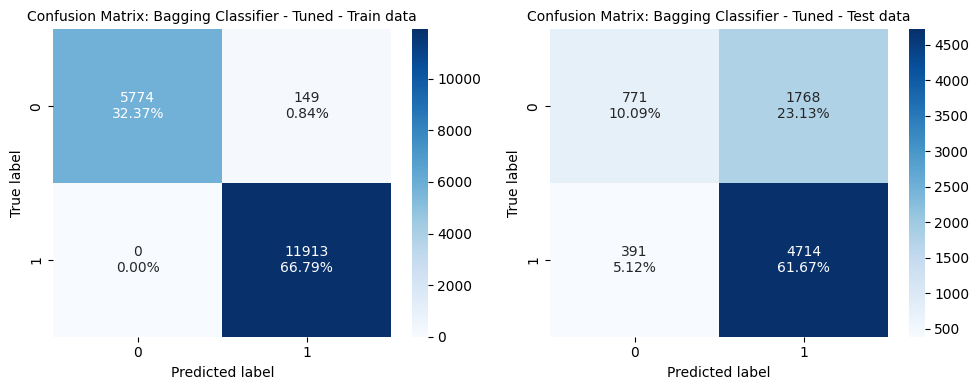

In [159]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(bagging_estimator_tuned, 'Bagging Classifier - Tuned')

**Observations**:

* The tuned model performs exceptionally well on the training data.
* However, its performance degrades on the test data

In [160]:
# compute the metrics on train and test data
model_performance_classification_sklearn(bagging_estimator)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.98           0.69          0.98         0.77             0.99   

   Test Precision  Train F1  Test F1  
0            0.77      0.99     0.77

### Rain Forest Classifier

In [161]:
# bagging classifier with decision tree
rf_estimator=RandomForestClassifier(random_state=42)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

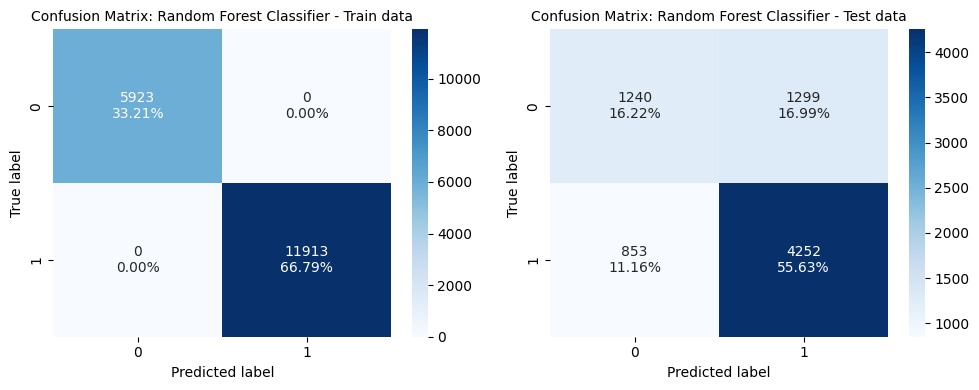

In [162]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(rf_estimator, 'Random Forest Classifier')

**Observations**:

* The model performs perfectly on the training data, with 0% false positives and 0% false negatives.
* However, its performance declines on the test data.

In [163]:
# compute the metrics on train and test data
model_performance_classification_sklearn(rf_estimator)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            1.00           0.72          1.00         0.83             1.00   

   Test Precision  Train F1  Test F1  
0            0.77      1.00     0.80

**Observations**:

* The metrics are perfect on the training data
* Inconsistent metrics on the test data suggest that the model is overfitting.

### Random Forest Classifier - Tuned

The important hyperparameters available for random forest classifier are:

* n_estimators: The number of trees in the forest, default = 100.

* max_features: The number of features to consider when looking for the best split.

* class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.

* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.

* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [164]:
rft_start_time = time.time()

In [165]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
## add from article
parameters = {
              "n_estimators": [10, 100,110],
              "min_samples_leaf": [6, 8, 10],
              "max_features": [0.2, 0.5, 0.7],
              "max_samples": [0.3, 0.5, 0.7],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.5, min_samples_leaf=8,
                       random_state=42)

In [166]:
rft_elapsed_time = time.time() - rft_start_time
print(f"Processing Time for Random Forest Tuned : {rft_elapsed_time:.2f}")

Processing Time for Random Forest Tuned : 606.04


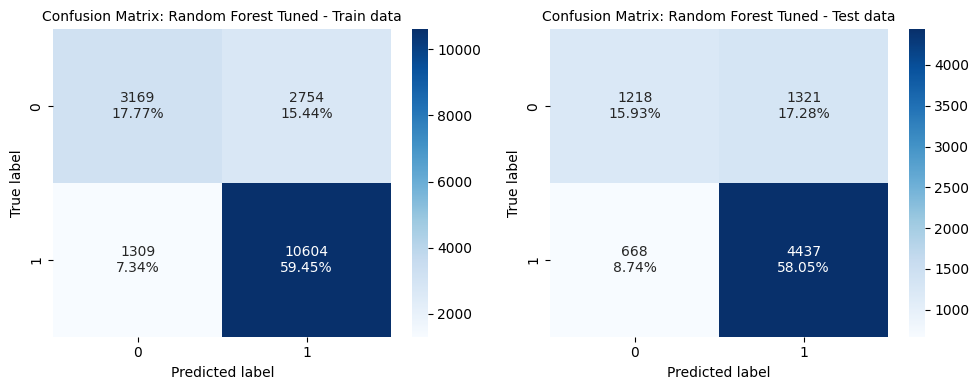

In [167]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(rf_estimator_tuned, 'Random Forest Tuned')

**Observations**:

* The model performs considerably well on the training data, with about 15% false positives and 7% false negatives.
* It shows consistent performance on the test data, with 17% false positives and 9% false negatives.

In [168]:
# compute the metrics on train and test data
model_performance_classification_sklearn(rf_estimator_tuned)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.77           0.74          0.89         0.87             0.79   

   Test Precision  Train F1  Test F1  
0            0.77      0.84     0.82

**Observations**:
*  The metrics are considerably good on the training data.
*  Consistent metrics on the test data indicate that the model is not overfitting.

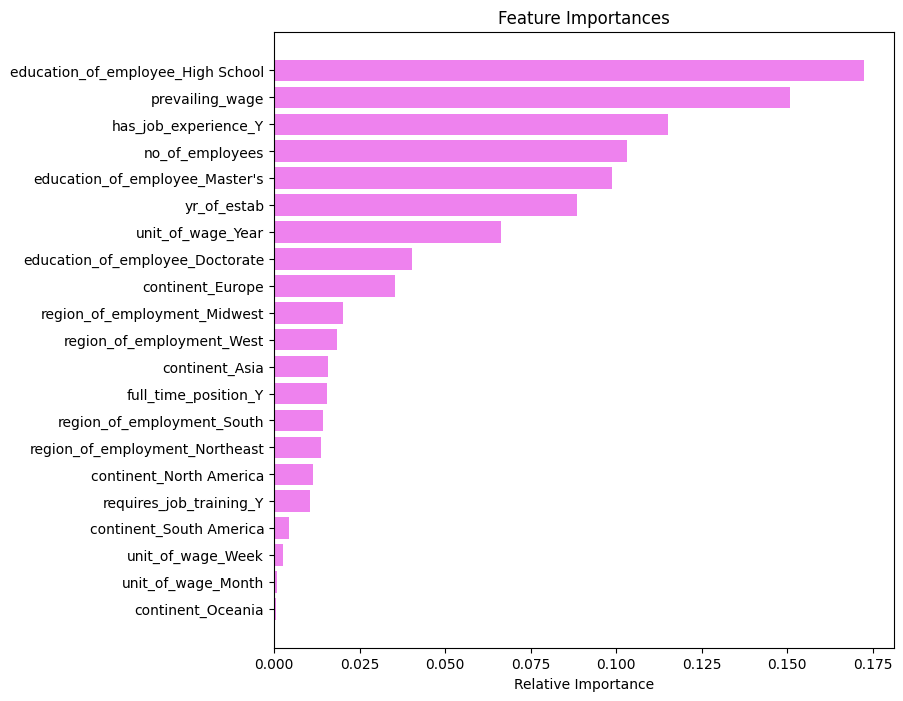

In [169]:
# plot important features
plot_important_features(rf_estimator_tuned)

**Observations**:

* The important features are
      education_of_employee_High School
      prevailing_wage
      has_job_experience_Y
      no_of_employees


### Random Forest - Class Weights - Tuned

Let's try using class_weights for random forest:
- The classes are imbalanced with 67% certified and 33% denied

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:1.52,1:0.75} because that is the original imbalance in our data. {0: 33%, 1 : 67%}

In [170]:
rfct_start_time = time.time()

In [171]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 1.52, 1: 0.75}],
    "n_estimators": [10, 100, 110],
    "min_samples_leaf": [7,8,10],
    "max_features": [0.3, 0.5, 0.7],
    "max_samples": [0.3, 0.5, 0.7],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.52, 1: 0.75}, max_features=0.7,
                       max_samples=0.3, min_samples_leaf=8, random_state=42)

In [172]:
rfct_elapsed_time = time.time() - rfct_start_time
print(f"Processing Time for Random Forest Tuned : {rfct_elapsed_time:.2f}")

Processing Time for Random Forest Tuned : 633.26


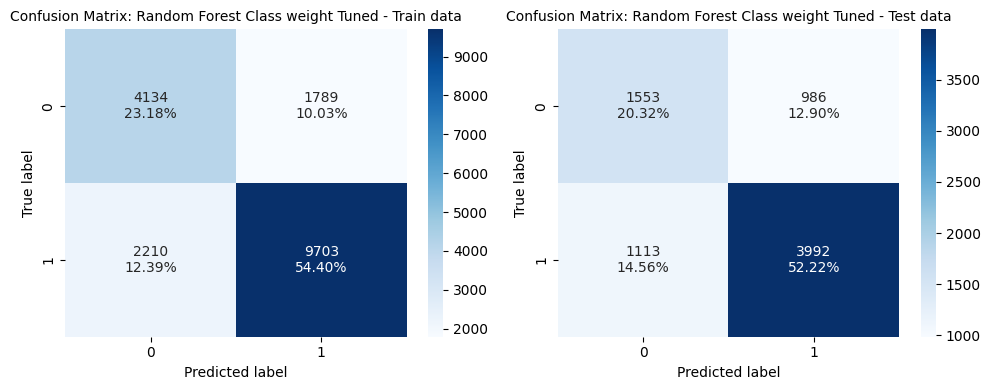

In [173]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(rf_estimator_weighted, 'Random Forest Class weight Tuned')

**Observations**:

* The model's performance slightly declined on the training data, showing 12% false negatives, but improved for false positives at 10%.

* On the test data, the model maintained consistent performance with 12% false positives and 14% false negatives.

In [174]:
# compute the metrics on train and test data
model_performance_classification_sklearn(rf_estimator_weighted)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.78           0.73          0.81         0.78             0.84   

   Test Precision  Train F1  Test F1  
0            0.80      0.83     0.79

**Observations**:
*  The accuracy, recall and F1 dropped slightly
*  The precision metric improved
*  The metrics are consistent on train and test data indicating that the model is not overfitted.

### Adaboost Classifier

In [175]:
# AdaBoost Classifier model
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

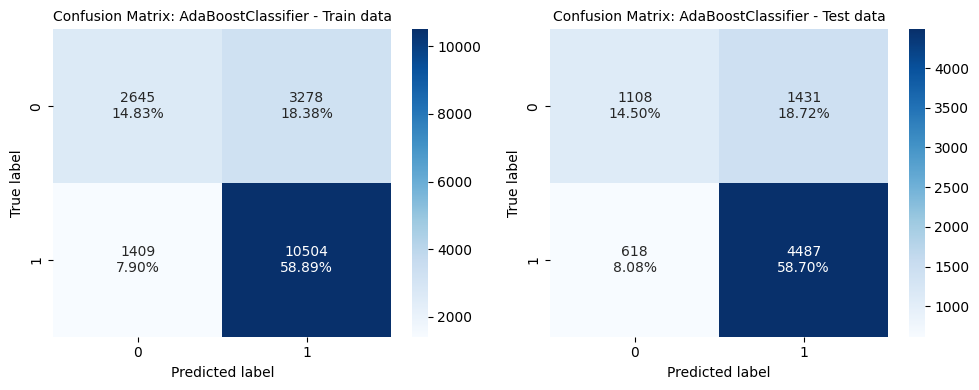

In [176]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(abc, 'AdaBoostClassifier')

**Observations**:

* The model's performance is considerably ok on the training data, with 18% false positives and 8% false negatives

* On the test data, the model shows consistent results with 18% false positives and 8% false negatives

In [177]:
# compute the metrics on train and test data
model_performance_classification_sklearn(abc)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.74           0.73          0.88         0.88             0.76   

   Test Precision  Train F1  Test F1  
0            0.76      0.82     0.81

**Observations**:

* The metrics are good on training data
* The metrics are consistent on test data indicating that the model is not overfitted

### Adaboost Classifier - Tuning

Some important hyperparamters are:

* estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1

* n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.

* learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [178]:
abct_start_time = time.time()

In [179]:
# Tune the AdabBoostClassifier.
abc_tuned = AdaBoostClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "estimator":[DecisionTreeClassifier(max_depth=1, random_state=42),
                      DecisionTreeClassifier(max_depth=2, random_state=42),
                      DecisionTreeClassifier(max_depth=3, random_state=42)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=0.7000000000000001, n_estimators=10,
                   random_state=42)

In [180]:
abct_elapsed_time = time.time() - abct_start_time
print(f"Processing Time for Adaboost Tuned : {abct_elapsed_time:.2f}")

Processing Time for Adaboost Tuned : 64.27


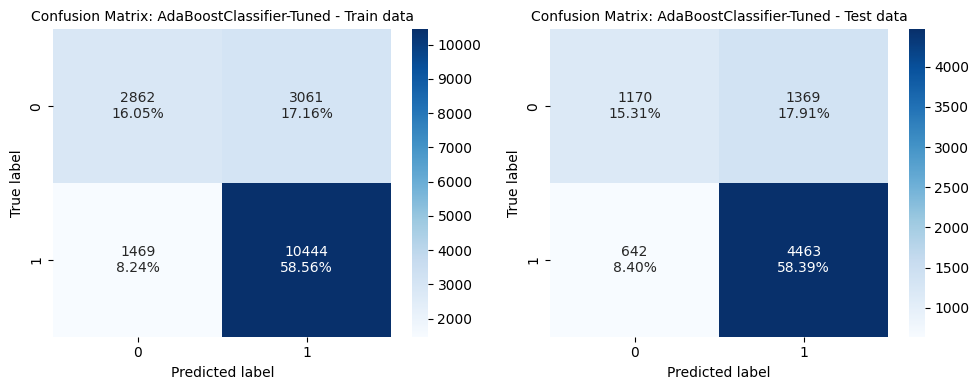

In [181]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(abc_tuned, 'AdaBoostClassifier-Tuned')

** Observations**:

* The performance of the model is slightly improved with 17% false positives and 8% false negatives
* The false positives and false negatives are consistent on test data with 18% false positives and 8% false negatives

In [182]:
# compute the metrics on train and test data
model_performance_classification_sklearn(abc_tuned)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.75           0.74          0.88         0.87             0.77   

   Test Precision  Train F1  Test F1  
0            0.77      0.82     0.82

**Observations**:

* The metrics improved with the tuning model slightly.

* The train and test results are consistent that indicates the model is not overfitted

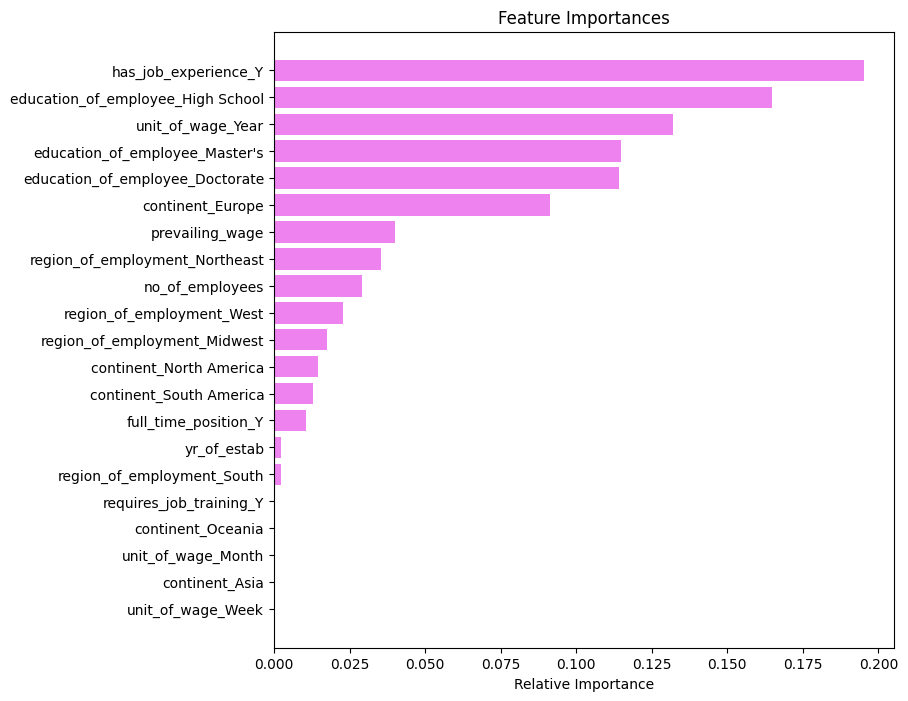

In [183]:
# plot important features
plot_important_features(abc_tuned)

**Observations**:

* The most important features are

      has_job_experience_Y
      education_of_employee_High School
      unit_of_wage_Year



### Gradient Boost Classifier

In [184]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

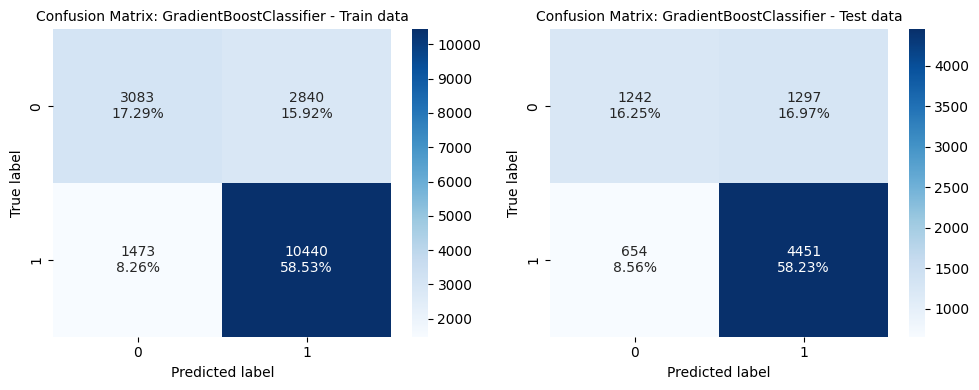

In [185]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(gbc, 'GradientBoostClassifier')

**Observations**:

* The model performs well on the training data with 16% false positives and 8% false negatives.
* It maintains consistency on the test data with 17% false positives and 8% false negatives.

In [186]:
# compute the metrics on train and test data
model_performance_classification_sklearn(gbc)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.76           0.74          0.88         0.87             0.79   

   Test Precision  Train F1  Test F1  
0            0.77      0.83     0.82

**Observations**:
* The metrics are good on train data
* The results are consistent on test data that indicates the model is not overfitting.

### GBC - Ada init

In [187]:
# AdaBoostClassifier is the initial estimator
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),random_state=42)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),
                           random_state=42)

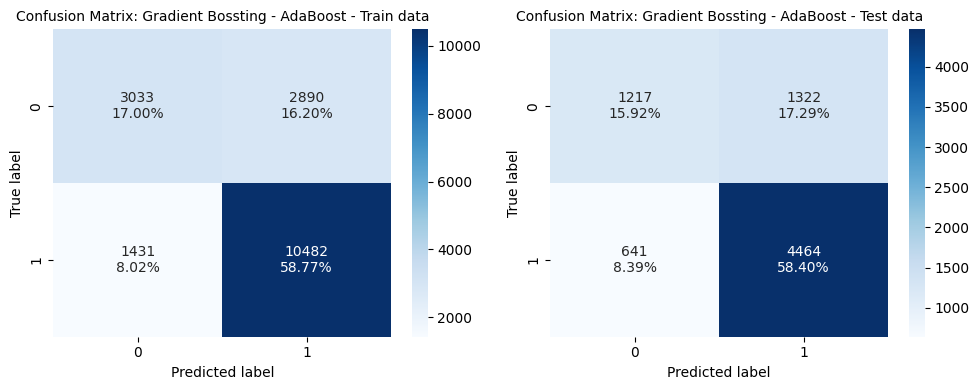

In [188]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(gbc_init, 'Gradient Bossting - AdaBoost')

**Observations**:

* The model is performing well with almost similar false positives and false negatives on the train and test data.

In [189]:
# compute the metrics on train and test data
model_performance_classification_sklearn(gbc_init)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.76           0.74          0.88         0.87             0.78   

   Test Precision  Train F1  Test F1  
0            0.77      0.83     0.82

**Observations**:

The model is giving similar results as default GBC.

### Gradient Boost Classifier - Tuning

In [190]:
gbct_start_time = time.time()

In [191]:
# GradientBoosting Tuned
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),random_state=42)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [10,100,110],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),
                           max_features=0.8, random_state=42, subsample=0.9)

In [192]:
gbct_elapsed_time = time.time() - gbct_start_time
print(f"Processing Time for GBC Tuned : {gbct_elapsed_time:.2f}")

Processing Time for GBC Tuned : 365.97


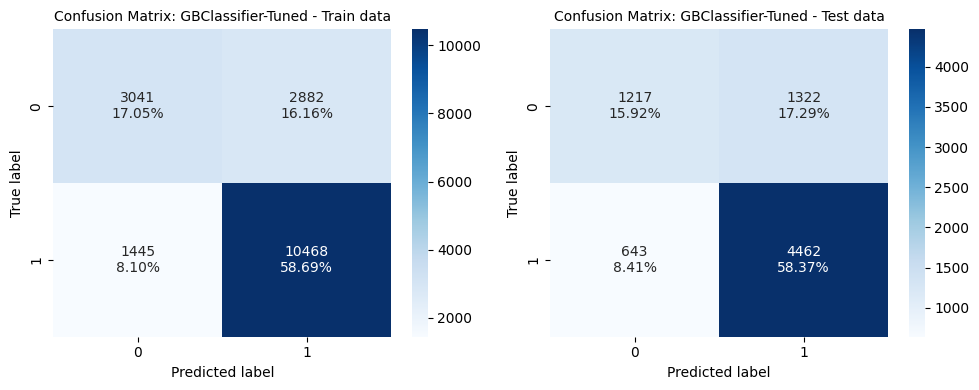

In [193]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(gbc_tuned, 'GBClassifier-Tuned')

**Observations**:

* The model performs well on the training data with 16% false positives and 8% false negatives.
* It maintains consistency on the test data with 17% false positives and 8% false negatives.

In [194]:
# compute the metrics on train and test data
model_performance_classification_sklearn(gbc_tuned)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.76           0.74          0.88         0.87             0.78   

   Test Precision  Train F1  Test F1  
0            0.77      0.83     0.82

**Observations**:

* The metrics are good on the training data.
* They remain consistent on the test data.
* The model demonstrates good generalization.

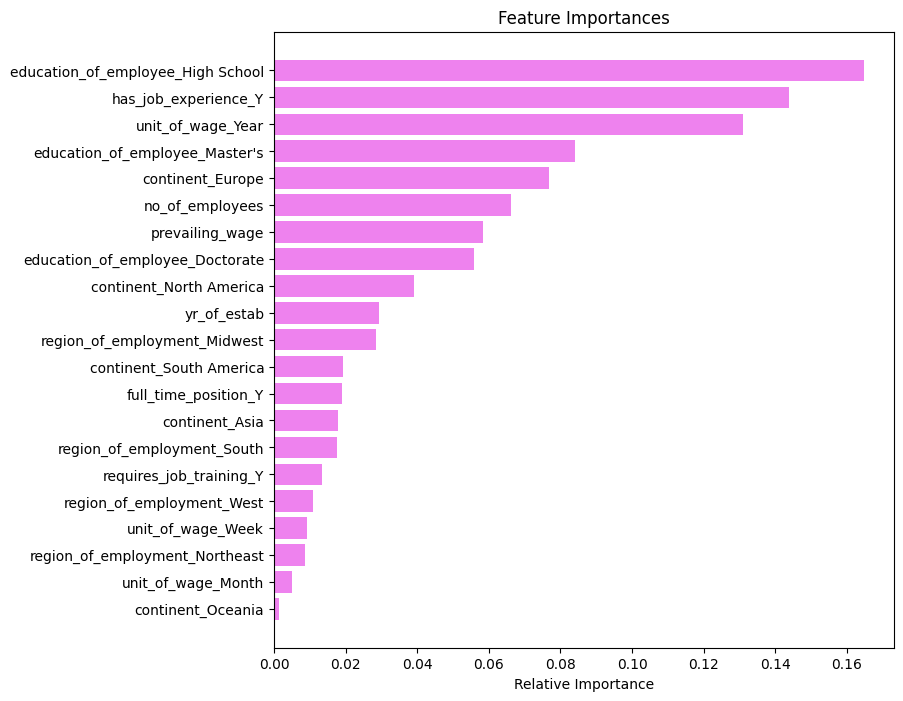

In [195]:
# plot important features
plot_important_features(gbc_tuned)

**Observations**:

The important features are

      *  education_of_employee_High School
      *  has_job_experience_Y
      *  unit_of_wage_Year

### Extreme Gradient Boosting

In [196]:
# eXtreme Gradient Boosting model
xgb = XGBClassifier(random_state=42,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

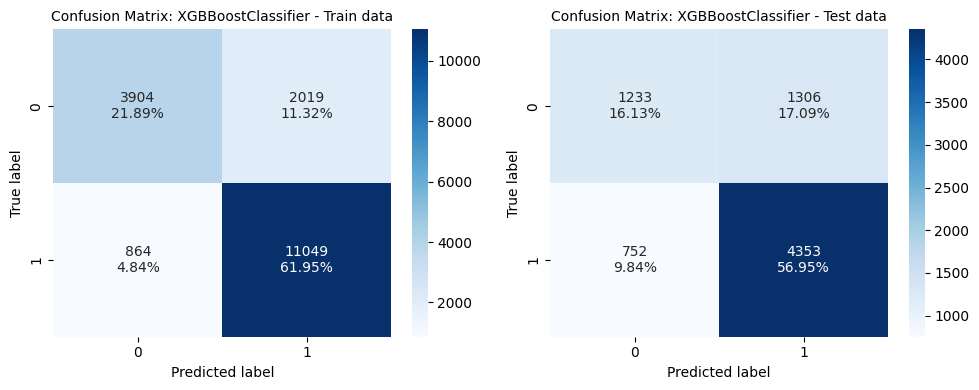

In [197]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(xgb, 'XGBBoostClassifier')

**Observations**:

* The model performs well on the training data with 11.32% false positives and 5% false negatives.
* However, it shows inconsistency on the test data with 17% false positives and 9% false negatives.

In [198]:
# compute the metrics on train and test data
model_performance_classification_sklearn(xgb)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.84           0.73          0.93         0.85             0.85   

   Test Precision  Train F1  Test F1  
0            0.77      0.88     0.81

**Observations**:

* The metrics are excellent on training data
* The metrics are not consistent on test data.
* The model is slightly overfitted and not generalizing well.

### Extreme Gradient Boost - Tuning

The hyperparameters for XGB Tuning are as below.

- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [199]:
xgbt_start_time = time.time()

In [200]:
# XGB Classifier Tuning
xgb_tuned = XGBClassifier(random_state=42,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,110),
    "scale_pos_weight":[0,0.49,1],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [201]:
xgbt_elapsed_time = time.time() - xgbt_start_time
print(f"Processing Time for XGB Tuned : {xgbt_elapsed_time:.2f}")

Processing Time for XGB Tuned : 857.72


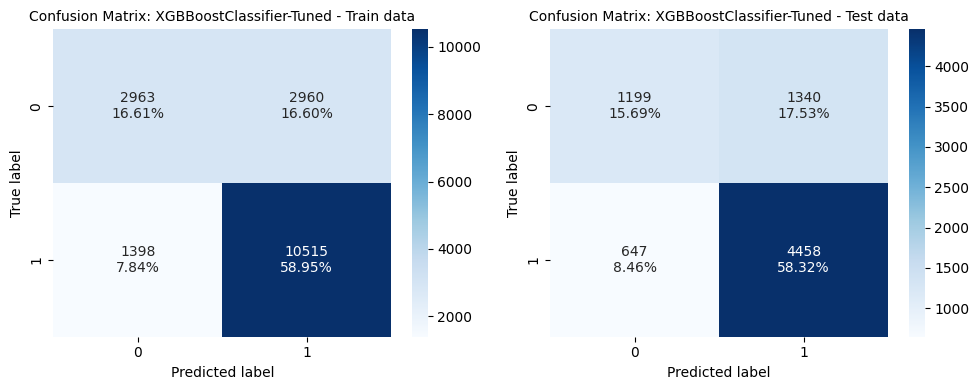

In [202]:
# confusion matrix on the train and test data
confusion_matrix_sklearn(xgb_tuned, 'XGBBoostClassifier-Tuned')

**Observations**:

* The model is performing good with 17% of false positives and 8% false negatives on the train data.

* The model is consistent on test data with 17% of false positives and 8% of false negatives on the test data

In [203]:
# compute the metrics on train and test data
model_performance_classification_sklearn(xgb_tuned)

Train Accuracy  Test Accuracy  Train Recall  Test Recall  Train Precision  \
0            0.76           0.74          0.88         0.87             0.78   

   Test Precision  Train F1  Test F1  
0            0.77      0.83     0.82

**Observations**:

* The model shows robust performance on the training data.
* It maintains consistent metrics on the test data.
* This indicates effective generalization.

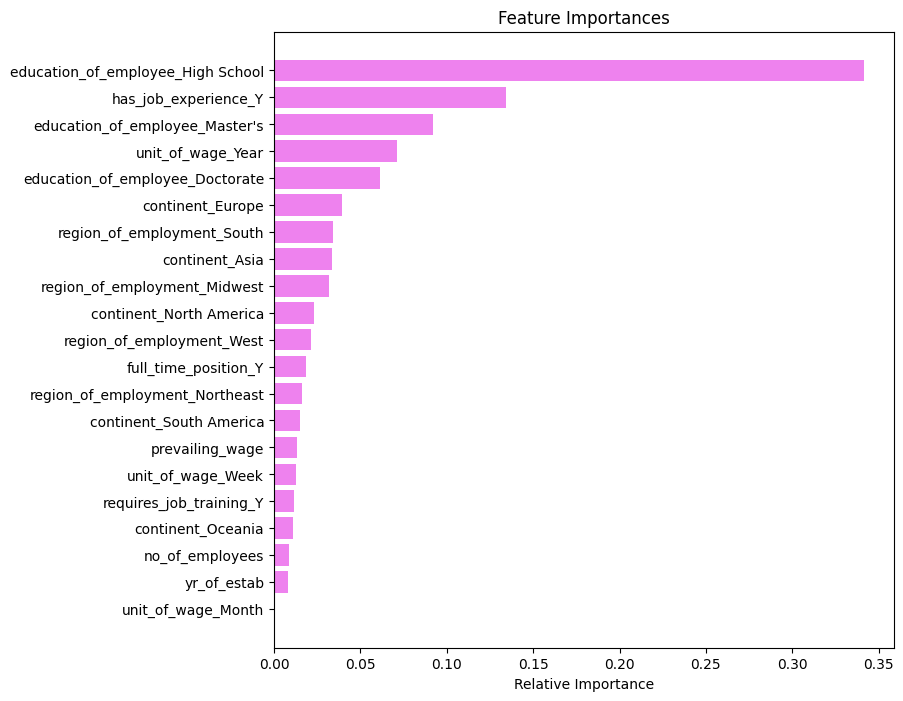

In [204]:
# plot important features
plot_important_features(xgb_tuned)

**Observations**:

The important features in the model are

* education_of_employee_High School
* has_job_experience_Y
* education_of_employee_Master's
* unit_of_wage_Year

### Compare the models

In [205]:
comp_models = pd.concat( [model_performance_classification_sklearn(dtree_def_model),
                                model_performance_classification_sklearn(dtree_cw_model),
                                model_performance_classification_sklearn(dtree_prepun_model),
                                model_performance_classification_sklearn(best_model_dpp),
                                model_performance_classification_sklearn(dtree_prepru_tuned),
                                model_performance_classification_sklearn(best_model_dpp),
                                model_performance_classification_sklearn(dtree_postpru_tuned),
                                model_performance_classification_sklearn(bagging_estimator),
                                model_performance_classification_sklearn(bagging_estimator_tuned),
                                model_performance_classification_sklearn(rf_estimator),
                                model_performance_classification_sklearn(rf_estimator_tuned),
                                model_performance_classification_sklearn(rf_estimator_weighted),
                                model_performance_classification_sklearn(abc),
                                model_performance_classification_sklearn(abc_tuned),
                                model_performance_classification_sklearn(gbc),
                                model_performance_classification_sklearn(gbc_init),
                                model_performance_classification_sklearn(gbc_tuned),
                                model_performance_classification_sklearn(xgb),
                                model_performance_classification_sklearn(xgb_tuned),  ],
                               axis=0)
comp_models.index = ['Decision Tree', 'Decision Tree - Class Weights','Decision Tree - Preprune','Decision Tree - Preprune - Best', 'Decision Tree - Preprune - Tuned',
                     'Decision Tree - Postprune', 'Decision Tree - Postprune - Tuned',
                     'Bagging Classifier', 'Bagging Classifier - Tuned', 'Random Forest','Random Forest - Tuned', 'RF - Tuned - Class Weights',
                     'Adaboost Classifier', 'Adaboost - Tuned', 'Gradient Boost Classifier', 'GBC - AdaInit', 'GBC - Tuned', 'Extreme Gradient Boosting','XGB - Tuned'
                     ]
comp_models = comp_models.reset_index().rename(columns={'index': 'Model'})

comp_models

Model  Train Accuracy  Test Accuracy  \
0                       Decision Tree            1.00           0.66   
1       Decision Tree - Class Weights            1.00           0.65   
2            Decision Tree - Preprune            0.71           0.71   
3     Decision Tree - Preprune - Best            0.71           0.71   
4    Decision Tree - Preprune - Tuned            0.76           0.74   
5           Decision Tree - Postprune            0.71           0.71   
6   Decision Tree - Postprune - Tuned            0.75           0.74   
7                  Bagging Classifier            0.98           0.69   
8          Bagging Classifier - Tuned            0.99           0.72   
9                       Random Forest            1.00           0.72   
10              Random Forest - Tuned            0.77           0.74   
11         RF - Tuned - Class Weights            0.78           0.73   
12                Adaboost Classifier            0.74           0.73   
13                   Adaboost - Tuned            0.75           0.74   
14          Gradient Boost Classifier            0.76           0.74   
15                      GBC - AdaInit            0.76           0.74   
16                        GBC - Tuned            0.76           0.74   
17          Extreme Gradient Boosting            0.84           0.73   
18                        XGB - Tuned            0.76           0.74   

    Train Recall  Test Recall  Train Precision  Test Precision  Train F1  \
0           1.00         0.75             1.00            0.74      1.00   
1           1.00         0.74             1.00            0.74      1.00   
2           0.93         0.93             0.72            0.72      0.81   
3           0.93         0.93             0.72            0.72      0.81   
4           0.88         0.88             0.78            0.77      0.83   
5           0.93         0.93             0.72            0.72      0.81   
6           0.87         0.86             0.78            0.77      0.82   
7           0.98         0.77             0.99            0.77      0.99   
8           1.00         0.92             0.99            0.73      0.99   
9           1.00         0.83             1.00            0.77      1.00   
10          0.89         0.87             0.79            0.77      0.84   
11          0.81         0.78             0.84            0.80      0.83   
12          0.88         0.88             0.76            0.76      0.82   
13          0.88         0.87             0.77            0.77      0.82   
14          0.88         0.87             0.79            0.77      0.83   
15          0.88         0.87             0.78            0.77      0.83   
16          0.88         0.87             0.78            0.77      0.83   
17          0.93         0.85             0.85            0.77      0.88   
18          0.88         0.87             0.78            0.77      0.83   

    Test F1  
0      0.74  
1      0.74  
2      0.81  
3      0.81  
4      0.82  
5      0.81  
6      0.82  
7      0.77  
8      0.81  
9      0.80  
10     0.82  
11     0.79  
12     0.81  
13     0.82  
14     0.82  
15     0.82  
16     0.82  
17     0.81  
18     0.82

**Conclusion**:

* The following models are performing exceptionally well with high metrics and demonstrate good generalization.
     1. Decision Tree - Preprune Tuned
     2. Varients of Gradient Boost Classifiers
     3. Extreme Gradient Boost - Tuned

* Out of the above models, **Extreme Gradient Boost - Tuned** (XGB-Tuned) is chosen for the following reasons:

     1. It is an ensemble technique, leveraging collective decisions for improved metrics.
     2. It supports parallel processing, enhancing computational efficiency.


**Note**:
* Exhaustive hyperparameter tuning was not conducted due to resource and time constraints.

* Further exploration of hyperparameters is recommended to optimize the model's performance


## Insights


* Europe has the highest proportion of visa approvals, followed by Africa.

* The average prevailing wage for certified and denied visa statuses does not differ significantly.

* The Northeast region exhibits the highest job demand, whereas the Island region shows the lowest

* Higher education is associated with an increased likelihood of visa certification

* The proportion of visa approvals and denials is nearly same for positions requiring job training

* The proportion of visa approvals is highest when the wage unit is "Year" and lowest when it is "Hour."

* Applicants with job experience have a higher likelihood of visa approval.

* Most of the applications are for full time job positions.

## Business Recommendations

The main important features to certify or deny the application are
  * Education of Employee
  * Job experience
  * Unit of wage
  * Continent

* Encourage applicants to highlight relevant educational qualifications prominently and go for higher educations.:

* Highlight relevant job experience and its impact on organizational success.

* Encourage employers to present wages on an annual basis

* Encourage employers to offer wages as per the prevailing wage in the industry and market.

* Provide tailored visa application guidance across the all continents

* Standardize training plans to align with industry standards.

* Build a pipeline to ingest real-time data and validate the model. Further refine the model based on the performance results from the real-time data

